<a id=libraries></a>
<h3 style="color:#4682B4">Import libraries and packages</h3>
<a href='#top'>🔼</a>

In [32]:
# ===================================================
# this will help in making the Python code more
# structured automatically (good coding practice)
from IPython import get_ipython

ipython = get_ipython()

if "nb_black" not in ipython.extension_manager.loaded:
    %load_ext nb_black
# ====================================================

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# handling dates and times
import datetime

# to do mathematical computations
import math

# a library for visualizing missing data can be very helpful when trying to understand the 'shape' of missing data.
import missingno as msno

# used for regular expressions, which can be very useful when cleaning text data
import re

# scikit-learn has a number of preprocessing functions that can scaling and normalizing data or encoding categorical variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import cdist

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

## Create a function to display side by side
from IPython.display import display_html


def display_side_by_side(*args):
    html_str = ""
    for df in args:
        html_str += df.to_html() + "&nbsp;&nbsp;&nbsp;"
    display_html(html_str.replace("table", 'table style="display:inline"'), raw=True)


# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

<h3 style="color:#4682B4">Load the dataframes</h3>

In [33]:
# read the orders.cleaned pickle file
# read the returns.cleaned pickle file
orders_cleaned = pd.read_pickle("../data/orders_cleaned.pkl")
returns_cleaned = pd.read_pickle("../data/returns_cleaned.pkl")

# read the orders.scaled pickle file
# read the returns.scaled pickle file
orders_scaled = pd.read_pickle("../data/orders_scaled.pkl")
returns_scaled = pd.read_pickle("../data/returns_scaled.pkl")

<IPython.core.display.Javascript object>

In [34]:
print("Shape of orders_cleaned: ", orders_cleaned.shape)
print("Shape of orders_scaled: ", orders_scaled.shape)
print("Shape of returns_cleaned: ", returns_cleaned.shape)
print("Shape of returns_scaled: ", returns_scaled.shape)

Shape of orders_cleaned:  (24059, 43)
Shape of orders_scaled:  (24059, 43)
Shape of returns_cleaned:  (1208, 23)
Shape of returns_scaled:  (1208, 23)


<IPython.core.display.Javascript object>

In [35]:
orders_cleaned.head()

Unit_Cost  Orders_Sales  Orders_Profit  Orders_Profit_Margin  \
0      23.95         95.80           0.33              0.003445   
1      11.43          3.43           0.33              0.096210   
2      23.95         95.80           0.33              0.003445   
3      23.95         95.80           0.33              0.003445   
4     141.60         42.48           0.28              0.006591   

   Orders_Quantity  Discount  Discount_Over_30  Region_ID  Order_Month_April  \
0                4      0.40                 1       1488                  0   
1                1      0.40                 1       1488                  0   
2                4      0.40                 1       1488                  0   
3                4      0.40                 1       1488                  0   
4                1      0.35                 1       1488                  0   

   Order_Month_August  Order_Month_December  Order_Month_February  \
0                   0                     1                     0   
1                   0                     1                     0   
2                   0                     1                     0   
3                   0                     1                     0   
4                   0                     0                     0   

   Order_Month_January  Order_Month_July  Order_Month_June  Order_Month_March  \
0                    0                 0                 0                  0   
1                    0                 0                 0                  0   
2                    0                 0                 0                  0   
3                    0                 0                 0                  0   
4                    0                 0                 0                  0   

   Order_Month_May  Order_Month_November  Order_Month_October  \
0                0                     0                    0   
1                0                     0                    0   
2                0                     0                    0   
3                0                     0                    0   
4                0                     1                    0   

   Order_Month_September  Ship_Mode_First Class  Ship_Mode_Same Day  \
0                      0                      0                   0   
1                      0                      0                   0   
2                      0                      0                   0   
3                      0                      0                   0   
4                      0                      0                   0   

   Ship_Mode_Second Class  Ship_Mode_Standard Class  \
0                       1                         0   
1                       1                         0   
2                       1                         0   
3                       1                         0   
4                       1                         0   

   Orders_Category_Furniture  Orders_Category_Office Supplies  \
0                          0                                0   
1                          0                                1   
2                          0                                0   
3                          0                                0   
4                          0                                1   

   Orders_Category_Technology  State_Illinois  State_Indiana  State_Iowa  \
0                           1               0              1           0   
1                           0               0              0           0   
2                           1               0              0           1   
3                           1               1              0           0   
4                           0               0              0           0   

   State_Kansas  State_Michigan  State_Minnesota  State_Missouri  \
0             0               0                0               0   
1             0               0                0               0   
2             0 

<IPython.core.display.Javascript object>

In [36]:
orders_scaled.head()

Unit_Cost  Orders_Sales  Orders_Profit  Orders_Profit_Margin  \
0  -0.416791     -0.303158      -0.016430             -0.018193   
1  -0.524585     -0.487015      -0.016430              0.312698   
2  -0.416791     -0.303158      -0.016430             -0.018193   
3  -0.416791     -0.303158      -0.016430             -0.018193   
4   0.596152     -0.409288      -0.017721             -0.006969   

   Orders_Quantity  Discount  Discount_Over_30  Region_ID  Order_Month_April  \
0         0.236276  1.027699          1.055268        0.0          -0.242189   
1        -1.074842  1.027699          1.055268        0.0          -0.242189   
2         0.236276  1.027699          1.055268        0.0          -0.242189   
3         0.236276  1.027699          1.055268        0.0          -0.242189   
4        -1.074842  0.660843          1.055268        0.0          -0.242189   

   Order_Month_August  Order_Month_December  Order_Month_February  \
0           -0.326292              2.776818             -0.207159   
1           -0.326292              2.776818             -0.207159   
2           -0.326292              2.776818             -0.207159   
3           -0.326292              2.776818             -0.207159   
4           -0.326292             -0.360124             -0.207159   

   Order_Month_January  Order_Month_July  Order_Month_June  Order_Month_March  \
0            -0.224459         -0.302747          -0.29064          -0.235578   
1            -0.224459         -0.302747          -0.29064          -0.235578   
2            -0.224459         -0.302747          -0.29064          -0.235578   
3            -0.224459         -0.302747          -0.29064          -0.235578   
4            -0.224459         -0.302747          -0.29064          -0.235578   

   Order_Month_May  Order_Month_November  Order_Month_October  \
0        -0.273463             -0.389061            -0.367377   
1        -0.273463             -0.389061            -0.367377   
2        -0.273463             -0.389061            -0.367377   
3        -0.273463             -0.389061            -0.367377   
4        -0.273463              2.570289            -0.367377   

   Order_Month_September  Ship_Mode_First Class  Ship_Mode_Same Day  \
0              -0.351674              -0.222717           -0.515813   
1              -0.351674              -0.222717           -0.515813   
2              -0.351674              -0.222717           -0.515813   
3              -0.351674              -0.222717           -0.515813   
4              -0.351674              -0.222717           -0.515813   

   Ship_Mode_Second Class  Ship_Mode_Standard Class  \
0                1.383391                 -0.815465   
1                1.383391                 -0.815465   
2                1.383391                 -0.815465   
3                1.383391                 -0.815465   
4                1.383391                 -0.815465   

   Orders_Category_Furniture  Orders_Category_Office Supplies  \
0                  -0.487837                        -1.259426   
1                  -0.487837                         0.794012   
2                  -0.487837                        -1.259426   
3                  -0.487837                        -1.259426   
4                  -0.487837                         0.794012   

   Orders_Category_Technology  State_Illinois  State_Indiana  State_Iowa  \
0                    2.035438       -0.520653       3.705807   -0.124288   
1                   -0.491295       -0.520653      -0.269847   -0.124288   
2                    2.035438       -0.520653      -0.269847    8.045805   
3                    2.035438        1.920664      -0.269847   -0.124288   
4                   -0.491295       -0.520653      -0.269847   -0.124288   

   State_Kansas  State_Michigan  State_Minnesota  State_Missouri  \
0     -0.097813       -0.338322        -0.196222       -0.169381   
1     -0.097813       -0.338322        -0.196222       -0.169381   
2     -0.097813 

<IPython.core.display.Javascript object>

In [37]:
returns_cleaned.head()

Returns_Sales  Returns_Profit  Returns_Profit_Margin  \
0          77.26         25.4958                0.33000   
1         130.32          0.0000                0.00000   
2          92.88          9.2880                0.10000   
3         130.32          0.0000                0.00000   
4         130.32         51.8400                0.39779   

   Returns_Category_Furniture  Returns_Category_Office Supplies  \
0                           0                                 1   
1                           0                                 1   
2                           0                                 1   
3                           0                                 1   
4                           0                                 1   

   Returns_Category_Technology  State_Illinois  State_Indiana  State_Iowa  \
0                            0               1              0           0   
1                            0               0              1           0   
2                            0               0              0           0   
3                            0               0              0           0   
4                            0               0              0           0   

   State_Kansas  State_Michigan  State_Minnesota  State_Missouri  \
0             0               0                0               0   
1             0               0                0               0   
2             0               1                0               0   
3             0               1                0               0   
4             0               0                0               0   

   State_Nebraska  State_North Dakota  State_Oklahoma  State_South Dakota  \
0               0                   0               0                   0   
1               0                   0               0                   0   
2               0                   0               0                   0   
3               0                   0               0                   0   
4               0                   0               0                   0   

   State_Texas  State_Wisconsin  Reason_Returned_Not Given  \
0            0                0                          1   
1            0                0                          1   
2            0                0                          0   
3            0                0                          1   
4            1                0                          1   

   Reason_Returned_Not Needed  Reason_Returned_Wrong Color  \
0                           0                            0   
1                           0                            0   
2                           1                            0   
3                           0                            0   
4                           0                            0   

   Reason_Returned_Wrong Item  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

<IPython.core.display.Javascript object>

In [38]:
returns_scaled.head()

Returns_Sales  Returns_Profit  Returns_Profit_Margin  \
0      -0.516542       -0.395792               0.818927   
1      -0.444612       -0.502828              -1.293266   
2      -0.495367       -0.463835              -0.653208   
3      -0.444612       -0.502828              -1.293266   
4      -0.444612       -0.285193               1.252823   

   Returns_Category_Furniture  Returns_Category_Office Supplies  \
0                     -0.5237                          0.819034   
1                     -0.5237                          0.819034   
2                     -0.5237                          0.819034   
3                     -0.5237                          0.819034   
4                     -0.5237                          0.819034   

   Returns_Category_Technology  State_Illinois  State_Indiana  State_Iowa  \
0                    -0.478426        1.868343      -0.298780   -0.095863   
1                    -0.478426       -0.535234       3.346942   -0.095863   
2                    -0.478426       -0.535234      -0.298780   -0.095863   
3                    -0.478426       -0.535234      -0.298780   -0.095863   
4                    -0.478426       -0.535234      -0.298780   -0.095863   

   State_Kansas  State_Michigan  State_Minnesota  State_Missouri  \
0     -0.095863       -0.318096        -0.209951       -0.187438   
1     -0.095863       -0.318096        -0.209951       -0.187438   
2     -0.095863        3.143705        -0.209951       -0.187438   
3     -0.095863        3.143705        -0.209951       -0.187438   
4     -0.095863       -0.318096        -0.209951       -0.187438   

   State_Nebraska  State_North Dakota  State_Oklahoma  State_South Dakota  \
0       -0.139317           -0.057639       -0.192119            -0.08165   
1       -0.139317           -0.057639       -0.192119            -0.08165   
2       -0.139317           -0.057639       -0.192119            -0.08165   
3       -0.139317           -0.057639       -0.192119            -0.08165   
4       -0.139317           -0.057639       -0.192119            -0.08165   

   State_Texas  State_Wisconsin  Reason_Returned_Not Given  \
0    -0.813402        -0.220479                   1.340260   
1    -0.813402        -0.220479                   1.340260   
2    -0.813402        -0.220479                  -0.746124   
3    -0.813402        -0.220479                   1.340260   
4     1.229404        -0.220479                   1.340260   

   Reason_Returned_Not Needed  Reason_Returned_Wrong Color  \
0                   -0.397741                    -0.432019   
1                   -0.397741                    -0.432019   
2                    2.514202                    -0.432019   
3                   -0.397741                    -0.432019   
4                   -0.397741                    -0.432019   

   Reason_Returned_Wrong Item  
0                   -0.731398  
1                   -0.731398  
2                   -0.731398  
3                   -0.731398  
4                   -0.731398

<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>  

<a id=libraries></a>
<h3 style="color:#4682B4">K-Means Clustering Elbow Algorithm</h3>
<a href='#top'>🔼</a>


Text(0.5, 1.0, 'SELECTING K WITH THE ELBOW METHOD FOR ORDERS')

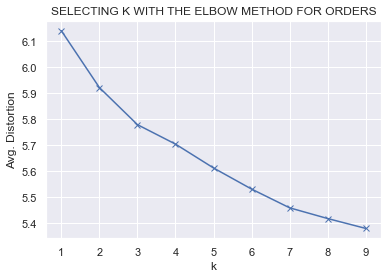

<IPython.core.display.Javascript object>

In [39]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

clusters = range(1, 10)
meanDistortions_orders = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(orders_scaled)
    prediction = model.predict(orders_scaled)
    meanDistortions_orders.append(
        sum(
            np.min(cdist(orders_scaled, model.cluster_centers_, "euclidean"), axis=1)
        )
        / orders_scaled.shape[0]
    )

plt.plot(clusters, meanDistortions_orders, "bx-")
plt.xlabel("k")
plt.ylabel("Avg. Distortion")
plt.title("SELECTING K WITH THE ELBOW METHOD FOR ORDERS")


Text(0.5, 1.0, 'SELECTING K WITH THE ELBOW METHOD FOR RETURNS')

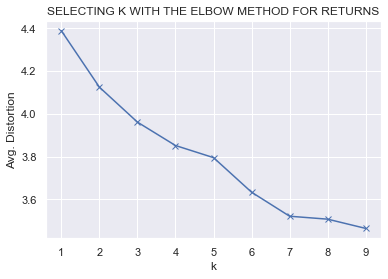

<IPython.core.display.Javascript object>

In [40]:
clusters = range(1, 10)
meanDistortions_returns = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(returns_scaled)
    prediction = model.predict(returns_scaled)
    meanDistortions_returns.append(
        sum(
            np.min(cdist(returns_scaled, model.cluster_centers_, "euclidean"), axis=1)
        )
        / returns_scaled.shape[0]
    )

plt.plot(clusters, meanDistortions_returns, "bx-")
plt.xlabel("k")
plt.ylabel("Avg. Distortion")
plt.title("SELECTING K WITH THE ELBOW METHOD FOR RETURNS")


<a id='section_id'></a>
<h3 style="color:blue">Create Dictionaries to Retrieve Information about the Models</h3>
<hr>
<h4 style="color:orange">OBSERVATION</h4>
<p style="font-size:15px">
created several dictionaries: models, distance_spaces, labels, centers, inertia, and distortion. Each of these dictionaries is used to store different pieces of information about each k-means model that you've created.
</p>
<ol>
<li>
<b>Models:</b>
<p>stores the actual k-means models themselves. Each key in the dictionary is a string that represents the name of the model (e.g., "orders_cleaned_k3"), and the value is the corresponding k-means model.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<p></p>
<li>
<b>distance_spaces:</b>
<p> stores the "distance space" of each model. The distance space is a measure of how far each data point is from each cluster center. This can be useful for understanding the spread of data within each cluster.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<p></p>
<li>
<b>labels:</b>
<p>  stores the labels for each data point. The labels tell you which cluster each data point was assigned to..</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<p></p>
<li>
<b>labels:</b>
<p>  stores the labels for each data point. The labels tell you which cluster each data point was assigned to..</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<p></p>
<li>
<b>centers:</b>
<p>   stores the inertia for each model. Inertia is a measure of how far the data points in a cluster are. It is used as a metric to estimate the quality of the clusters. Lower values are better..</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<p></p>
<li>
<b>distortion:</b>
<p>   stores the distortion for each model. Distortion is another measure of the quality of the clusters. It is calculated as the average distance of all data points to their respective cluster centers. Like inertia, lower values are better.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<!-- Add as many list items as you need -->
</ol>
<a href='#top'>🔼</a>


<div style="border-top: 3px solid black"></div>  

<a id=kmeans></a>

<h3 style="color:blue">K-Means Clustering K=3 Model, K=4 Model, K=5 Model</h3>

<hr>

<h4 style="color:orange">OBSERVATION</h4>

<p style="font-size:15px">
The models are trained on the scaled data because KMeans is a distance-based algorithm, and it's a good practice to use scaled data. However, the resulting cluster labels are added to the original non-scaled dataframes as well as the scaled dataframes to examine the cluster assignments in the context of both the original and the standardized data. The steps of copying, assigning, instantiating, fitting, predicting, and appending are repeated for each number of clusters (k=3, k=4, k=5) for both the orders and returns datasets.
</p>

<ol>
<li>
<b>Copy :</b>
<p>Create copies of the data frames. The data frames that are copied include:</p>
<ul>
    <li>orders_scaled</li>
    <li>orders_cleaned</li>
    <li>returns_scaled</li>
    <li>returns_cleaned</li>
</ul>
</li>

<p></p>

<li>
<b>Assign :</b>
<p>Assign the copies to their corresponding names. The names are formed by appending '_kn' to the original data frame name, where n is the number of clusters.</p>
<ul>
    <li>'orders_scaled_kn'</li>
    <li>'orders_cleaned_kn'</li>
    <li>'returns_scaled_kn'</li>
    <li>'returns_cleaned_kn'</li>
</ul>
</li>

<p></p>

<li>
<b>Instantiate :</b>
<p>Instantiate a KMeans clustering model with n clusters. The models are named by appending '_model_kn' to the corresponding data frame name.</p>
<ul>
    <li>'orders_scaled_kn_model_kn'</li>
    <li>'orders_cleaned_kn_model_kn'</li>
    <li>'returns_scaled_kn_model_kn'</li>
    <li>'returns_cleaned_kn_model_kn'</li>
</ul>
</li>

<p></p>

<li>
<b>Fit :</b>
<p>Fit the instantiated KMeans clustering model on the scaled data. The data used for fitting includes:</p>
<ul>
    <li>orders_scaled</li>
    <li>returns_scaled</li>
</ul>
</li>

<p></p>

<li>
<b>Predict :</b>
<p>Predict which group each record will be clustered into, using the corresponding model.</p>
</li>

<p></p>

<li>
<b>Append :</b>
<p>Add a new column named 'Kn_GROUP' to the corresponding data frame, which contains the cluster assignments for each record.</p>
</li>
</ol>

<a href='#top'>🔼</a>


In [41]:
# Initialize an empty dictionary to store the models
models = {}

# Initialize dictionaries for other information
distance_spaces = {}
labels = {}
centers = {}
inertia = {}
distortion = {}
cluster_counts = {} # Store cluster counts

# List of your datasets
datasets = [orders_cleaned, returns_cleaned, orders_scaled, returns_scaled]

# List of names for your datasets
names = ["orders_cleaned", "returns_cleaned", "orders_scaled", "returns_scaled"]

# List of number of clusters
clusters = [3, 4, 5]

# Lists to store dataframes for shape and head display
shape_dfs = []
head_dfs = []

# For each dataset, create a model for each number of clusters
for data, name in zip(datasets, names):
    for k in clusters:
        # Create a unique name for each model
        model_name = f"{name}_k{k}"
        
        # Instantiate and fit the model
        model = KMeans(n_clusters=k)
        model.fit(data)
        
        # Store the model in the dictionary
        models[model_name] = model

        # Compute and store distance space, labels, and centers
        distance_spaces[model_name] = model.transform(data)
        labels[model_name] = model.labels_
        centers[model_name] = model.cluster_centers_

        # Compute and store Inertia and Distortion
        inertia[model_name] = model.inertia_
        distortion[model_name] = sum(np.min(cdist(data, model.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0]
        
        # Compute and store cluster count
        cluster_counts[model_name] = len(set(labels[model_name]))
        
        # Create a copy of the dataset and add the labels
        data_copy = data.copy()
        data_copy[f"K{k}_GROUP"] = labels[model_name]
        
        # Store dataframe for shape and head display
        shape_dfs.append(pd.DataFrame({"Shape": [data_copy.shape]}, index=[model_name]))
        head_dfs.append(data_copy)


# Now use the dictionaries to access the information for each model


<IPython.core.display.Javascript object>

In [43]:
# Store the model names
model_names = list(models.keys())

# Create a list to hold the shape dataframes with the model names
shape_dfs_with_names = []

# Loop through shape_dfs and model_names and create a new dataframe with the model name as the index
for df, name in zip(shape_dfs, model_names):
    df_with_name = df.copy()
    df_with_name.index = [name]
    shape_dfs_with_names.append(df_with_name)

# Display shapes
display_side_by_side(*shape_dfs_with_names)


Shape 
 
 
 
 
 orders_cleaned_k3 
 (24059, 44) 
 
 
     
 
 
 
 Shape 
 
 
 
 
 orders_cleaned_k4 
 (24059, 44) 
 
 
     
 
 
 
 Shape 
 
 
 
 
 orders_cleaned_k5 
 (24059, 44) 
 
 
     
 
 
 
 Shape 
 
 
 
 
 returns_cleaned_k3 
 (1208, 24) 
 
 
     
 
 
 
 Shape 
 
 
 
 
 returns_cleaned_k4 
 (1208, 24) 
 
 
     
 
 
 
 Shape 
 
 
 
 
 returns_cleaned_k5 
 (1208, 24) 
 
 
     
 
 
 
 Shape 
 
 
 
 
 orders_scaled_k3 
 (24059, 44) 
 
 
     
 
 
 
 Shape 
 
 
 
 
 orders_scaled_k4 
 (24059, 44) 
 
 
     
 
 
 
 Shape 
 
 
 
 
 orders_scaled_k5 
 (24059, 44) 
 
 
     
 
 
 
 Shape 
 
 
 
 
 returns_scaled_k3 
 (1208, 24) 
 
 
     
 
 
 
 Shape 
 
 
 
 
 returns_scaled_k4 
 (1208, 24) 
 
 
     
 
 
 
 Shape 
 
 
 
 
 returns_scaled_k5 
 (1208, 24)

<IPython.core.display.Javascript object>

In [45]:
# Store the model names
model_names = list(models.keys())

# Create a list to hold the head dataframes with the model names
head_dfs_with_names = []

# Loop through head_dfs and model_names and create a new dataframe with the model name as the index
for df, name in zip(head_dfs, model_names):
    df_with_name = df.head(5).copy()  # Get only the first 5 rows
    df_with_name.index = [name]*len(df_with_name)
    head_dfs_with_names.append(df_with_name)

# Display heads
display_side_by_side(*head_dfs_with_names)


Unit_Cost 
 Orders_Sales 
 Orders_Profit 
 Orders_Profit_Margin 
 Orders_Quantity 
 Discount 
 Discount_Over_30 
 Region_ID 
 Order_Month_April 
 Order_Month_August 
 Order_Month_December 
 Order_Month_February 
 Order_Month_January 
 Order_Month_July 
 Order_Month_June 
 Order_Month_March 
 Order_Month_May 
 Order_Month_November 
 Order_Month_October 
 Order_Month_September 
 Ship_Mode_First Class 
 Ship_Mode_Same Day 
 Ship_Mode_Second Class 
 Ship_Mode_Standard Class 
 Orders_Category_Furniture 
 Orders_Category_Office Supplies 
 Orders_Category_Technology 
 State_Illinois 
 State_Indiana 
 State_Iowa 
 State_Kansas 
 State_Michigan 
 State_Minnesota 
 State_Missouri 
 State_Nebraska 
 State_North Dakota 
 State_Oklahoma 
 State_South Dakota 
 State_Texas 
 State_Wisconsin 
 Segment_Consumer 
 Segment_Corporate 
 Segment_Home Office 
 K3_GROUP 
 
 
 
 
 orders_cleaned_k3 
 23.95 
 95.80 
 0.33 
 0.003445 
 4 
 0.40 
 1 
 1488 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 orders_cleaned_k3 
 11.43 
 3.43 
 0.33 
 0.096210 
 1 
 0.40 
 1 
 1488 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 orders_cleaned_k3 
 23.95 
 95.80 
 0.33 
 0.003445 
 4 
 0.40 
 1 
 1488 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 orders_cleaned_k3 
 23.95 
 95.80 
 0.33 
 0.003445 
 4 
 0.40 
 1 
 1488 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 orders_cleaned_k3 
 141.60 
 42.48 
 0.28 
 0.006591 
 1 
 0.35 
 1 
 1488 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
     
 
 
 
 Unit_Cost 
 Orders_Sales 
 Orders_Profit 
 Orders_Profit_Margin 
 Orders_Quantity 
 Discount 
 Discount_Over_30 
 Region_ID 
 Order_Month_April 
 Order_Month_August 
 Order_Month_December 
 Order_Month_February 
 Order_Month_January 
 Order_Month_July 
 Order_Month_June 
 Order_Month_March 
 Order_Month_May 
 Order_Month_November 
 Order_Month_October 
 Order_Month_September 
 Ship_Mode_First Class 
 Ship_Mode_Same Day 
 Ship_Mode_Second Class 
 Ship_Mode_Standard Class 
 Orders_Category_Furniture 
 Orders_Category_Office Supplies 
 Orders_Category_Technology 
 State_Illinois 
 State_Indiana 
 State_Iowa 
 State_Kansas 
 State_Michigan 
 State_Minnesota 
 State_Missouri 
 State_Nebraska 
 State_North Dakota 
 State_Oklahoma 
 State_South Dakota 
 State_Texas 
 State_Wisconsin 
 Segment_Consumer 
 Segment_Corporate 
 Segment_Home Office 
 K4_GROUP 
 
 
 
 
 orders_cleaned_k4 
 23.95 
 95.80 
 0.33 
 0.003445 
 4 
 0.40 
 1 
 1488 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 orders_cleaned_k4 
 11.43 
 3.43 
 0.33 
 0.096210 
 1 
 0.40 
 1 
 1488 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 orders_cleaned_k4 
 23.95 
 95.80 
 0.33 
 0.003445 
 4 
 0.40 
 1 
 1488 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 orders_cleaned_k4 
 23.95 
 95.80 
 0.33 
 0.003445 
 4 
 0.40 
 1 
 1488 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 orders_cleaned_k4 
 141.60 
 42.48 
 0.28 
 0.006591 
 1 
 0.35 
 1 
 1488 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
     
 
 
 

<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>  


<a id='distance_spaces'></a>
<h3 style="color:blue">Cluster Distance Space</h3>
<hr>
<h4 style="color:orange">OBSERVATION</h4>
<p style="font-size:15px">
In this code, cdist is a function from scipy.spatial.distance that computes the distance between each pair of two collections of inputs. It is import it with from scipy.spatial.distance import cdist at the top of your file if you haven't already.
</p>
<ol>
<li>
<b>Distance Space:</b>
<p>The sklearn KMeans object has a method called transform that returns the distance between each observation and each cluster centroid. Each KMeans model will transform the dataframe on which it was trained. Each row in the returned array corresponds to an observation in the data, and each column corresponds to a cluster. The value at a specific position in the array represents the distance between that observation and the cluster centroid.

For instance, 3 clusters and 5 observations, the transform method would return a 5x3 array. Each row corresponds to an observation and each column to a cluster. The value at [2,1] would represent the distance between the third observation and the second cluster.

In examining distances, smaller values are preferable as they indicate that an observation is closer to its own cluster's centroid. Similar distances to multiple centroids may suggest less distinct clustering; in such a case, consider revisiting the number of clusters or the features used for clustering.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<p></p>
<!-- Add as many list items as you need -->
</ol>
<a href='#top'>🔼</a>


In [13]:
# This code loops over all the model names stored in model_names,
# which is simply a list of the keys in the models dictionary.
# For each model name, it prints the corresponding distance space (.transform).

# Distance Space


model_names = list(models.keys())

# For each model name
for name in model_names:
    # Print the Distance Spaces
    print(f"Distance Spaces for {name}:")
    print(distance_spaces[name])
    print()  # Newline for readability

Distance Spaces for orders_cleaned_k3:
[[  25.32063445 3037.75116049  849.25197852]
 [ 112.59435719 3130.96685729  941.8791279 ]
 [  25.32269498 3037.75117099  849.25204781]
 ...
 [ 117.05905405 3134.24220015  945.85132266]
 [  77.94715559 3094.63103247  906.09162926]
 [  77.94230476 3094.63091258  906.09121402]]

Distance Spaces for orders_cleaned_k4:
[[   17.19465546   681.85711829 10092.60314858  2268.13110574]
 [  100.95531017   774.26170417 10185.63870802  2361.32725422]
 [   17.19765964   681.85720721 10092.60314858  2268.13112591]
 ...
 [  105.43233939   778.35219108 10189.22412031  2364.69998728]
 [   66.43363838   738.61442427 10149.50900148  2325.04318187]
 [   66.42793928   738.61392068 10149.50897116  2325.04301742]]

Distance Spaces for orders_cleaned_k5:
[[  489.99155066    15.70797088  1425.87918959 10092.60314858
   3080.68789284]
 [  581.90872003    84.96590256  1518.91363334 10185.63870802
   3173.90651041]
 [  489.99166586    15.71128342  1425.87923136 10092.60314858

<IPython.core.display.Javascript object>

<a id=libraries></a>
<h3 style="color:blue">Labels and Cluster Centers</h3>

<hr>

<h4 style="color:orange">OBSERVATION</h4>

<p style="font-size:15px">
The .labels_ attribute returns an array where the ith index represents the cluster label of the ith instance in the dataset. The cluster labels are the predicted clusters for each observation in your dataset.
    
The .cluster_centers_ attribute returns an array where the ith index is a coordinate array representing the centroid of the ith cluster. These are the coordinates for the center of each cluster.

Examining the labels and the cluster centers reveals insights into the structure and distribution of the data points within each cluster. The labels show how the data points are grouped, providing a sense of the distinct categories or groups within the data. The cluster centers represent the "average" or "typical" data point within each cluster, offering understanding about the characteristics of each group.

For instance, in a customer segmentation scenario, the labels reveal the number of customers in each segment, while the cluster centers provide information about the typical behavior or characteristics of customers within each segment.    
    
<ol>
<li><b>List Item One:</b>Sentence One</li>

<li><b>List Item Two::</b>Sentence Two</li>

<li><b>List Item Three:</b> Sentence Three</li>

<li><b>List Item Four:</b>Sentence Four</li>
</ol>
</p>
<a href='#top'>🔼</a>

In [14]:
# This code loops over all the model names stored in model_names, 
# which is simply a list of the keys in the models dictionary. 
# For each model name, it prints the corresponding labels and centers. 

# Labels and Centers
model_names = list(models.keys())

# For each model name
for name in model_names:
    # Print the labels
    print(f"Labels for {name}:")
    print(labels[name])
    print()  # Newline

    # Print the centers
    print(f"Centers for {name}:")
    print(centers[name])
    print()  # Newline


Labels for orders_cleaned_k3:
[0 0 0 ... 0 0 0]

Centers for orders_cleaned_k3:
[[ 4.39250799e+01  1.11197284e+02  4.94419417e-01  9.06338829e-03
   3.23916786e+00  2.48003348e-01  4.52462936e-01  1.48800000e+03
   5.63845050e-02  9.56480153e-02  1.16164515e-01  4.10329986e-02
   4.80631277e-02  8.33094213e-02  7.83835485e-02  5.33237685e-02
   6.93926351e-02  1.30224773e-01  1.17455763e-01  1.10616930e-01
   5.33715925e-02  2.40554758e-01  3.51889048e-01  3.54184601e-01
   1.65471066e-01  6.74844572e-01  1.59684362e-01  2.14347202e-01
   6.72883788e-02  1.51123864e-02  9.18220947e-03  1.02247728e-01
   3.66810139e-02  2.82161645e-02  1.91774271e-02  4.97369680e-03
   3.18029651e-02  5.93017695e-03  4.14777618e-01  5.02630320e-02
   5.10090866e-01  2.91630799e-01  1.98278336e-01]
 [ 4.57480551e+02  3.10245417e+03  9.18956522e-01  3.21528197e-03
   7.11884058e+00  3.67536232e-01  6.57971014e-01  1.48800000e+03
   5.50724638e-02  1.10144928e-01  1.07246377e-01  4.34782609e-02
   5.217391

<IPython.core.display.Javascript object>

<a id=libraries></a>
<h3 style="color:blue">Cluster Counter</h3>

<hr>

<h4 style="color:orange">OBSERVATIONS</h4>

<p style="font-size:15px">
Print the size of each cluster (i.e., the number of data points assigned to each cluster) for each model and data frame. The keys in the resulting Counter objects represent the cluster labels, and the values represent the number of data points assigned to each cluster.

Examining the cluster sizes can provide insights about the distribution of the data points across the clusters. For example, if the data points are evenly distributed across the clusters, this might suggest that the clustering is robust. On the other hand, if a few clusters contain the majority of the data points, this might suggest that the clustering is skewed and perhaps the number of clusters or the features used for clustering could be reevaluated.

<ol>
<li><b>List Item One:</b>Sentence One</li>

<li><b>List Item Two::</b>Sentence Two</li>

<li><b>List Item Three:</b> Sentence Three</li>

<li><b>List Item Four:</b>Sentence Four</li>
</ol>
</p>
<a href='#top'>🔼</a>


In [15]:
# This code loops over all the model names stored in model_names,
# which is simply a list of the keys in the models dictionary.
# For each model name, it prints the corresponding count (size) of each cluster.

# List of all model names
model_names = list(models.keys())

# For each model name
for name in model_names:
    # Print the Cluster Counter
    print(f"Cluster Counter for {name}:")
    print(np.bincount(labels[name]))
    print()  # Newline

Cluster Counter for orders_cleaned_k3:
[20910   345  2804]

Cluster Counter for orders_cleaned_k4:
[20267  3167    13   612]

Cluster Counter for orders_cleaned_k5:
[ 3684 19178   958    13   226]

Cluster Counter for returns_cleaned_k3:
[960  55 193]

Cluster Counter for returns_cleaned_k4:
[883  99  27 199]

Cluster Counter for returns_cleaned_k5:
[859  42  94 200  13]

Cluster Counter for orders_scaled_k3:
[7335 8496 8228]

Cluster Counter for orders_scaled_k4:
[ 892 7910 7082 8175]

Cluster Counter for orders_scaled_k5:
[1154 4458 6224 7805 4418]

Cluster Counter for returns_scaled_k3:
[ 99 646 463]

Cluster Counter for returns_scaled_k4:
[ 99 244 218 647]

Cluster Counter for returns_scaled_k5:
[359 410  93 190 156]



<IPython.core.display.Javascript object>

<a id=libraries></a>
<h3 style="color:blue">Intertia and Distortion</h3>

<hr>

<h4 style="color:orange">Intertia and Distortion</h4>

<p style="font-size:15px">
Correct understanding of Inertia and Distortion in the context of K-means clustering.

Inertia describes the sum of the squared distances between each training instance and its closest centroid. It acts as a metric that measures how internally coherent clusters are. K-means algorithm tries to minimize the inertia when choosing the optimal number of clusters.

Distortion, on the other hand, measures the sum of the squared distances between each data point and the centroid of its assigned cluster. This is an indication of how far, on average, data points are from their cluster center. A lower distortion indicates that data points are, on average, closer to their centroids, hence better clustered.
    
This distortion metric is useful because it gives us an idea of how "tight" or well-defined our clusters are. The lower the distortion, the closer each data point is to the center of its cluster, meaning the clusters are more compact. Conversely, high distortion means the data points are more spread out from their cluster centers, indicating less well-defined clusters.

This metric can be particularly important when determining the optimal number of clusters (k) in your data. The Elbow Method is a common technique that uses this concept. You compute the distortion for different values of k and plot them. The "elbow" of the plot, where the rate of decrease sharply shifts, can be a good choice for k as it indicates the point where adding more clusters doesn't significantly improve the compactness.

<ol>
<li><b>List Item One:</b>Sentence One</li>

<li><b>List Item Two::</b>Sentence Two</li>

<li><b>List Item Three:</b> Sentence Three</li>

<li><b>List Item Four:</b>Sentence Four</li>
</ol>
</p>
<a href='#top'>🔼</a>


In [16]:
# This code loops over all the model names stored in model_names,
# which is simply a list of the keys in the models dictionary.
# For each model name, it prints the corresponding intertia and distortion.

# List of all model names
model_names = list(models.keys())

# For each model name
for name in model_names:
    # Print the Inertia
    print(f"Inertia for {name}:")
    print(inertia[name])
    print()  # Newline for readability

    # Print the Distortion
    print(f"Distortion for {name}:")
    print(distortion[name])
    print()  # Newline for readability

Inertia for orders_cleaned_k3:
1828789804.7273324

Distortion for orders_cleaned_k3:
144.28928408643506

Inertia for orders_cleaned_k4:
1097163238.8439624

Distortion for orders_cleaned_k4:
129.7063014911631

Inertia for orders_cleaned_k5:
743908746.2968104

Distortion for orders_cleaned_k5:
110.23775470290748

Inertia for returns_cleaned_k3:
114639834.49084213

Distortion for returns_cleaned_k3:
201.39944362524147

Inertia for returns_cleaned_k4:
70893320.36562417

Distortion for returns_cleaned_k4:
159.2742707041677

Inertia for returns_cleaned_k5:
45709856.8044944

Distortion for returns_cleaned_k5:
139.2113978843987

Inertia for orders_scaled_k3:
911312.7180713498

Distortion for orders_scaled_k3:
5.779856514515139

Inertia for orders_scaled_k4:
889525.0172226204

Distortion for orders_scaled_k4:
5.70416282669725

Inertia for orders_scaled_k5:
866881.5387672174

Distortion for orders_scaled_k5:
5.61234816732915

Inertia for returns_scaled_k3:
23979.509984205684

Distortion for retu

<IPython.core.display.Javascript object>

Number of Clusters: 3 	Average Distortion: 88.83176306875278
Number of Clusters: 4 	Average Distortion: 74.74095353961525
Number of Clusters: 5 	Average Distortion: 64.74842514438672


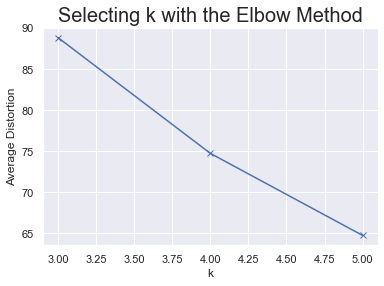

<IPython.core.display.Javascript object>

In [46]:
import matplotlib.pyplot as plt

# Separate distortions by number of clusters
distortions_by_k = {k: [] for k in clusters}
for model_name, dist in distortion.items():
    _, k_str = model_name.rsplit('_k', 1)
    k = int(k_str)
    distortions_by_k[k].append(dist)

# Calculate the mean distortion for each number of clusters
mean_distortions = {k: sum(dist_list) / len(dist_list) for k, dist_list in distortions_by_k.items()}

# Print and plot mean distortions
for k, mean_dist in mean_distortions.items():
    print("Number of Clusters:", k, "\tAverage Distortion:", mean_dist)

plt.plot(list(mean_distortions.keys()), list(mean_distortions.values()), "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()


In [48]:
# K=4 PROFILE
# The names of the models we're interested in
model_names = ["orders_cleaned_k4", "returns_cleaned_k4", "orders_scaled_k4", "returns_scaled_k4"]

for model_name in model_names:
    print(f"\nModel: {model_name}")
    
    # Get the labels for this model
    label = labels[model_name]
    
    # Get the name of the original dataset
    data_name = model_name.rsplit('_k', 1)[0]
    
    # Find the original dataset
    for name, data in zip(names, datasets):
        if name == data_name:
            break
    else:
        print(f"Could not find dataset for {model_name}")
        continue
    
    # Add the labels to a copy of the data
    data_with_labels = data.copy()
    data_with_labels['GROUP'] = label
    
    # Group the data by the labels and print out some statistics for each group
    grouped = data_with_labels.groupby('GROUP')
    for name, group in grouped:
        print(f"\nGroup {name}")
        print(group.describe())



Model: orders_cleaned_k4

Group 0
          Unit_Cost  Orders_Sales  Orders_Profit  Orders_Profit_Margin  \
count  20260.000000  20260.000000   20260.000000          20260.000000   
mean      40.366286     99.986824       0.460497              0.009241   
std       51.348749     99.901350       9.980125              0.304427   
min        0.420000      0.440000    -426.990000             -2.747212   
25%       10.320000     25.080000       0.100000              0.000758   
50%       22.230000     59.940000       0.190000              0.002263   
75%       49.230000    145.745000       0.290000              0.006661   
max      651.480000    447.840000     468.960000             41.245383   

       Orders_Quantity      Discount  Discount_Over_30  Region_ID  \
count     20260.000000  20260.000000      20260.000000    20260.0   
mean          3.213722      0.245368          0.448124     1488.0   
std           2.145097      0.131366          0.497314        0.0   
min           1.000000

         Unit_Cost  Orders_Sales  Orders_Profit  Orders_Profit_Margin  \
count  3173.000000   3173.000000    3173.000000           3173.000000   
mean    209.803996    750.806001       3.885531              0.005127   
std     133.043165    282.549239      43.144418              0.058031   
min       1.540000    325.060000    -447.180000             -0.640028   
25%     115.530000    524.180000       0.190000              0.000226   
50%     173.940000    664.770000       0.280000              0.000369   
75%     266.610000    914.340000       0.380000              0.000570   
max    1039.990000   1539.360000     754.700000              1.632313   

       Orders_Quantity     Discount  Discount_Over_30  Region_ID  \
count      3173.000000  3173.000000       3173.000000     3173.0   
mean          4.439332     0.333659          0.600693     1488.0   
std           2.411326     0.134374          0.489833        0.0   
min           1.000000     0.000000          0.000000     1488.0   
25

       Returns_Sales  Returns_Profit  Returns_Profit_Margin  \
count     201.000000      201.000000             201.000000   
mean      758.683433      196.238363               0.265373   
std       235.300343      110.513734               0.126823   
min       448.800000        0.000000               0.000000   
25%       545.920000      109.694400               0.190000   
50%       735.660000      170.459100               0.280000   
75%       892.220000      267.182400               0.380000   
max      1401.840000      507.589200               0.470000   

       Returns_Category_Furniture  Returns_Category_Office Supplies  \
count                  201.000000                        201.000000   
mean                     0.323383                          0.164179   
std                      0.468935                          0.371363   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%   

         Unit_Cost  Orders_Sales  Orders_Profit  Orders_Profit_Margin  \
count  4692.000000   4692.000000    4692.000000           4692.000000   
mean      0.606639      0.481800       0.034425             -0.009884   
std       1.468637      1.519665       1.836309              0.244743   
min      -0.616193     -0.491871     -99.173797             -7.168006   
25%      -0.219712     -0.247326      -0.022368             -0.029539   
50%       0.259337      0.034142      -0.020045             -0.027949   
75%       0.880792      0.609164      -0.016430             -0.024336   
max      23.484345     27.372197      37.141763              5.078556   

       Orders_Quantity     Discount  Discount_Over_30  Region_ID  \
count      4692.000000  4692.000000       4692.000000     4692.0   
mean          0.006859     0.195547          0.014121        0.0   
std           0.998132     1.041728          1.000767        0.0   
min          -1.074842    -1.907156         -0.947627        0.0   
25

       Returns_Sales  Returns_Profit  Returns_Profit_Margin  \
count     186.000000      186.000000             186.000000   
mean       -0.202795       -0.249008              -0.005165   
std         0.496228        0.368133               0.755840   
min        -0.606286       -0.502828              -1.293266   
25%        -0.535874       -0.464550              -0.653208   
50%        -0.412713       -0.387898               0.242874   
75%        -0.114702       -0.210535               0.562903   
max         1.940873        1.798193               2.291061   

       Returns_Category_Furniture  Returns_Category_Office Supplies  \
count                  186.000000                        186.000000   
mean                    -0.000433                         -0.036444   
std                      1.002398                          1.009355   
min                     -0.523700                         -1.220951   
25%                     -0.523700                         -1.220951   
50%   

<IPython.core.display.Javascript object>

In [50]:
orders_scaled.columns


Index(['Unit_Cost', 'Orders_Sales', 'Orders_Profit', 'Orders_Profit_Margin',
       'Orders_Quantity', 'Discount', 'Discount_Over_30', 'Region_ID',
       'Order_Month_April', 'Order_Month_August', 'Order_Month_December',
       'Order_Month_February', 'Order_Month_January', 'Order_Month_July',
       'Order_Month_June', 'Order_Month_March', 'Order_Month_May',
       'Order_Month_November', 'Order_Month_October', 'Order_Month_September',
       'Ship_Mode_First Class', 'Ship_Mode_Same Day', 'Ship_Mode_Second Class',
       'Ship_Mode_Standard Class', 'Orders_Category_Furniture',
       'Orders_Category_Office Supplies', 'Orders_Category_Technology',
       'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas',
       'State_Michigan', 'State_Minnesota', 'State_Missouri', 'State_Nebraska',
       'State_North Dakota', 'State_Oklahoma', 'State_South Dakota',
       'State_Texas', 'State_Wisconsin', 'Segment_Consumer',
       'Segment_Corporate', 'Segment_Home Office'],
      dt

<IPython.core.display.Javascript object>

In [51]:
returns_scaled.columns


Index(['Returns_Sales', 'Returns_Profit', 'Returns_Profit_Margin',
       'Returns_Category_Furniture', 'Returns_Category_Office Supplies',
       'Returns_Category_Technology', 'State_Illinois', 'State_Indiana',
       'State_Iowa', 'State_Kansas', 'State_Michigan', 'State_Minnesota',
       'State_Missouri', 'State_Nebraska', 'State_North Dakota',
       'State_Oklahoma', 'State_South Dakota', 'State_Texas',
       'State_Wisconsin', 'Reason_Returned_Not Given',
       'Reason_Returned_Not Needed', 'Reason_Returned_Wrong Color',
       'Reason_Returned_Wrong Item'],
      dtype='object')

<IPython.core.display.Javascript object>

<a id='section_id'></a>
<h3 style="color:blue">KMeans BoxPlots</h3>
<hr>
<h4 style="color:orange">OBSERVATION</h4>
<p style="font-size:15px">
Creating boxplots for datasets can help to visualize the distribution of the data within each feature, and by grouping them according to the KMeans clusters, its easy to compare these distributions across different groups. This can give insights into how the KMeans algorithm is dividing the data.
</p>
<ol>
<li>
<b>orders_scaled:</b>
<p>For the orders_scaled dataframe, the features that might be especially informative in a boxplot could include: Orders_Sales, Orders_Profit, Orders_Proft_Margin. These features directly relate to the financial aspects of the orders. Differences in distributions across clusters could indicate that certain groups of orders are more profitable than others.
    
For the orders_scaled dataframe, the features that might be especially informative in a boxplot could include: Orders_Quantity, Discount. These features could reveal patterns related to the quantity of items in the orders and the discounts given, which might have interesting relationships with the profit features.
    
For the orders_scaled dataframe, the features that might be especially informative in a boxplot could include: Orders_Month. The features representing different months could reveal seasonal trends in the data, showing if certain clusters are more common in specific months.
    
For the orders_scaled dataframe, the features that might be especially informative in a boxplot could include: Ship_Mode, Orders_Category.   
   
</p>
<ul>
    <li>Orders_Sales</li>
    <li>Orders_Profit</li>
    <li>Orders_Profit_Margin</li>
    <li>Orders_Quantity</li>
    <li>Discount</li>
    <li>Order_Month</li>
    <li>Ship_Mode</li>
    <li>Orders_Category</li>
</ul>
</li>
<p></p>
<li>
<b>returns_scaled:</b>
<p>For the returns_scaled dataframe, potential features of interest might include: Returns_Sales, Returns_Profit, Returns_Profit_Margin. Similar to the orders dataframe, these features relate to the financial aspects of the returns.
    
For the returns_scaled dataframe, potential features of interest might include: Returns_Category. These features could indicate if certain product categories are more likely to be returned than others.
    
For the returns_scaled dataframe, potential features of interest might include: Reason_Returned. The 'Reason_Returned_...' features might reveal common reasons for returns in different clusters.
    </p>
<ul>
    <li>Returns_Sales</li>
    <li>Returns_Profit</li>
    <li>Returns_Profit_Margin</li>
    <li>Returns_Category</li>
    <li>Reason_Returned</li>
</ul>
</li>
<!-- Add as many list items as you need -->
</ol>
<a href='#top'>🔼</a>


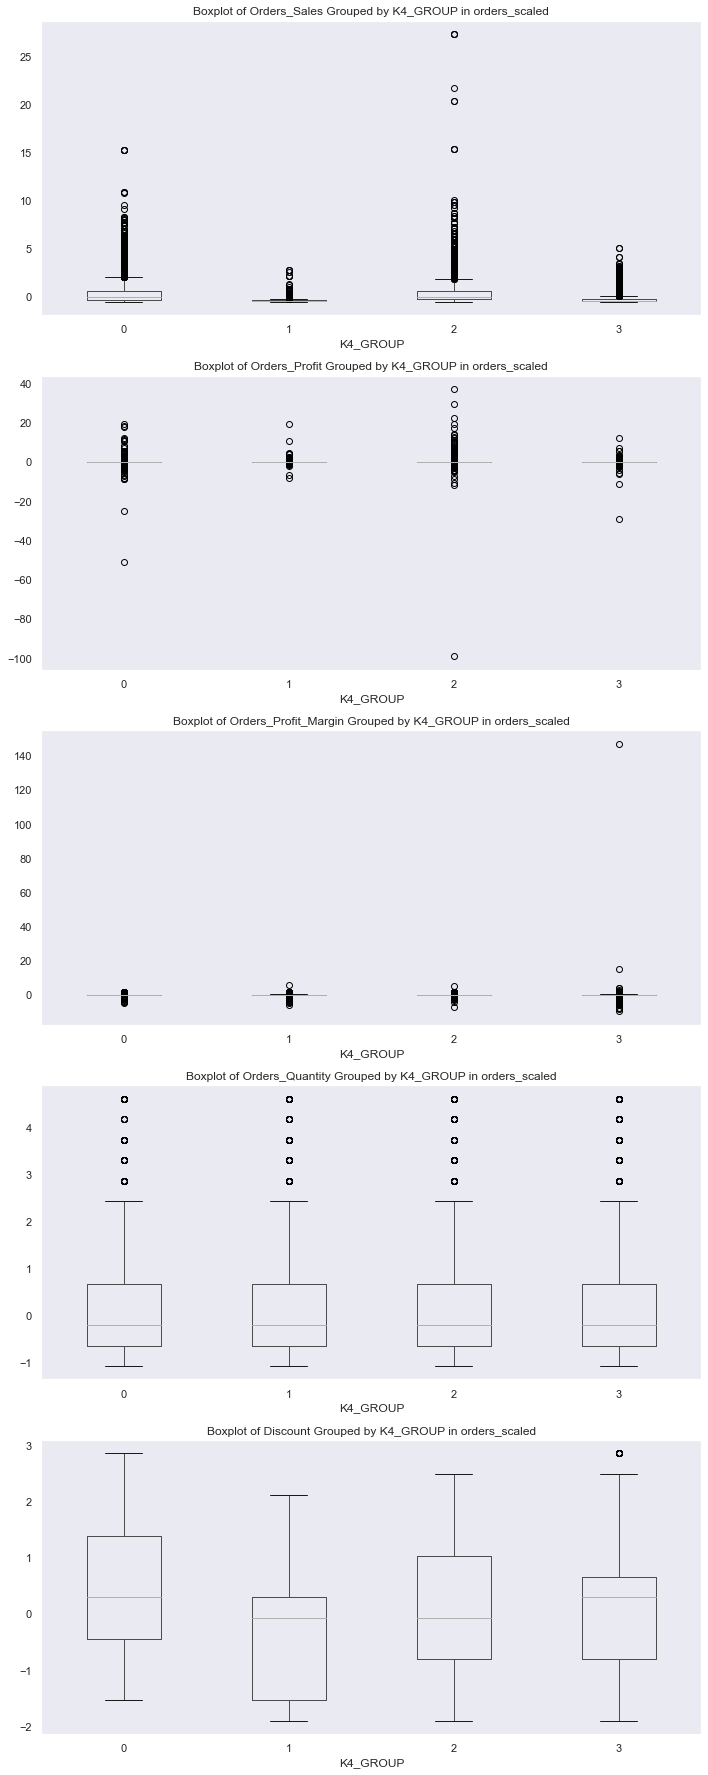

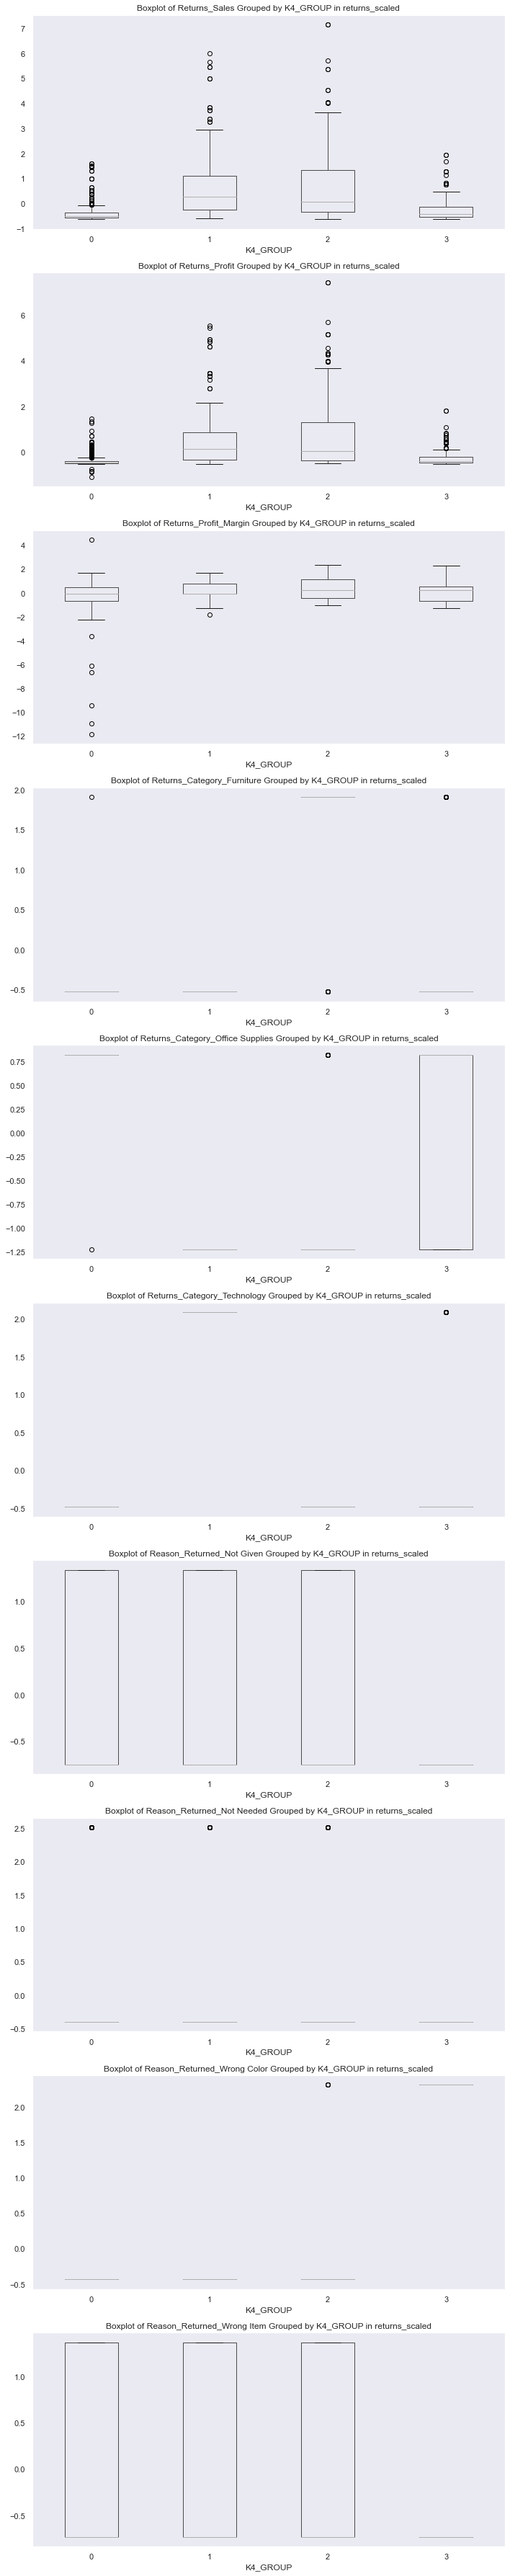

<IPython.core.display.Javascript object>

In [55]:
# Updated features for orders_scaled dataframe
selected_features_orders = ['Orders_Sales', 'Orders_Profit', 'Orders_Profit_Margin', 'Orders_Quantity', 'Discount']

# Features for returns_scaled dataframe (remains the same)
selected_features_returns = ['Returns_Sales', 'Returns_Profit', 'Returns_Profit_Margin', 'Returns_Category_Furniture', 'Returns_Category_Office Supplies', 'Returns_Category_Technology', 'Reason_Returned_Not Given', 'Reason_Returned_Not Needed', 'Reason_Returned_Wrong Color', 'Reason_Returned_Wrong Item']

# Get the dataframe for orders_scaled_k4 and returns_scaled_k4
orders_scaled_k4_df = head_dfs[names.index("orders_scaled") * len(clusters) + clusters.index(4)]
returns_scaled_k4_df = head_dfs[names.index("returns_scaled") * len(clusters) + clusters.index(4)]

# Create subplots for the boxplots - the number of plots is based on the number of features
fig, axs = plt.subplots(len(selected_features_orders), 1, figsize=(10, 5*len(selected_features_orders)))

# Create a boxplot on each subplot for orders_scaled_k4_df
for i, feature in enumerate(selected_features_orders):
    orders_scaled_k4_df.boxplot(by='K4_GROUP', column=feature, grid=False, ax=axs[i])
    axs[i].set_title(f'Boxplot of {feature} Grouped by K4_GROUP in orders_scaled')

# Remove the default figure title and show the plots
plt.suptitle('')
plt.tight_layout()
plt.show()

# Create subplots for the boxplots - the number of plots is based on the number of features
fig, axs = plt.subplots(len(selected_features_returns), 1, figsize=(10, 5*len(selected_features_returns)))

# Create a boxplot on each subplot for returns_scaled_k4_df
for i, feature in enumerate(selected_features_returns):
    returns_scaled_k4_df.boxplot(by='K4_GROUP', column=feature, grid=False, ax=axs[i])
    axs[i].set_title(f'Boxplot of {feature} Grouped by K4_GROUP in returns_scaled')

# Remove the default figure title and show the plots
plt.suptitle('')
plt.tight_layout()
plt.show()


<div style="border-top: 3px solid black"></div>  


<a id='section_id'></a>
<h3 style="color:blue">Silhouette Scores</h3>
<hr>
<h4 style="color:orange">OBSERVATION</h4>
<p style="font-size:15px">
The silhouette score is a measure used to assess the quality of the clustering done by an unsupervised learning algorithm. It provides a succinct graphical representation of how well each data point has been classified.

The silhouette score ranges from -1 to 1. Here's what each score range indicates:

A score close to 1 indicates that the data point is very similar to other data points in the cluster, and not similar to data points in the neighboring clusters. This signifies that the data point is well-clustered or classified.

A score close to 0 indicates that the data point is on or very close to the decision boundary between two neighboring clusters. This means that the data point could be assigned to either cluster, indicating that the clustering or classification is not particularly strong.

A score close to -1 indicates that the data point is incorrectly clustered or classified as it is much more similar to data points in the neighboring clusters than to data points in its own cluster.

Therefore, the higher the silhouette score, the better the algorithm has classified the data points into clusters. A high average silhouette score for all data points in all clusters indicates that the clustering algorithm has done a good job of grouping together similar data points. Conversely, a low or negative average silhouette score suggests that the algorithm may have created poor clusters by either not grouping similar data points together or grouping dissimilar data points in the same cluster.

Keep in mind, however, that while the silhouette score can be a useful tool for comparing the quality of different clustering models, it may not always align perfectly with the domain-specific goals or requirements of a given clustering task. Therefore, it's always important to consider the specific context and objectives when interpreting silhouette scores.
    

Yes, you're correct in saying that you're primarily interested in the scaled models. The reason for this is that many machine learning algorithms, including KMeans, use distance-based metrics to determine the similarity or dissimilarity between data points. If your features are not on the same scale, a feature with a larger range of values could dominate the calculation of these distances, leading to a model that doesn't perform as well as it could. Scaling ensures that all features contribute approximately proportionately to the final distance.

Looking at the silhouette scores for the scaled models, a higher score indicates that the data points are, on average, more similar to the data points in their own cluster than to data points in other clusters. Therefore, we generally want the model with the highest silhouette score.

In this case, the model with the highest silhouette score among the scaled models is "returns_scaled_k4" with a silhouette score of 0.1497. This model has 4 clusters, and was trained on the scaled returns dataset. It's important to note, though, that these silhouette scores are quite low, which suggests that the clusters in these models might not be particularly well-separated. Depending on your specific goals, you might want to consider different approaches to feature engineering, dimensionality reduction, or other clustering algorithms to improve your results.
</p>
<ol>
<li>
<b>Sub-section Title :</b>
<p>Description for this sub-section goes here.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<p></p>
<li>
<b>Another Sub-section Title :</b>
<p>Description for this sub-section goes here.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<!-- Add as many list items as you need -->
</ol>
<a href='#top'>🔼</a>


In [56]:
from sklearn.metrics import silhouette_score

# Initialize an empty dictionary to store the silhouette scores
sil_scores = {}

# Compute Silhouette Score for each model
for model_name in models:
    sil_scores[model_name] = silhouette_score(datasets[names.index(model_name.split('_k')[0])], labels[model_name])

# Display Silhouette Scores
for model_name, score in sil_scores.items():
    print(f"Silhouette Score for {model_name}: {score}\n")


Silhouette Score for orders_cleaned_k3: 0.761446035641006

Silhouette Score for orders_cleaned_k4: 0.7418557910578806

Silhouette Score for orders_cleaned_k5: 0.7093569709526674

Silhouette Score for returns_cleaned_k3: 0.7380089451667627

Silhouette Score for returns_cleaned_k4: 0.6913216051257612

Silhouette Score for returns_cleaned_k5: 0.6813152619180056

Silhouette Score for orders_scaled_k3: 0.08653555037951798

Silhouette Score for orders_scaled_k4: 0.06699350197445388

Silhouette Score for orders_scaled_k5: 0.0696915407471732

Silhouette Score for returns_scaled_k3: 0.142219532577872

Silhouette Score for returns_scaled_k4: 0.14970580867498118

Silhouette Score for returns_scaled_k5: 0.14740336842508905



<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>  


<a id='section_id'></a>
<h3 style="color:blue">Silhouette Visualizer</h3>
<hr>
<h4 style="color:orange">OBSERVATION</h4>
<p style="font-size:15px">
The Silhouette Visualizer is a model visualization tool which displays the silhouette score for each sample in a dataset on a per-cluster basis. It provides a way to assess the quality of clustering performed by an unsupervised learning algorithm.

The Silhouette Visualizer generates a plot where each cluster is represented by a silhouette plot. Each silhouette plot is made up of multiple components, where each component corresponds to a single data point in the cluster. The length of the component represents the silhouette score of that data point.

Here's how to interpret a Silhouette Visualizer:

Length of the silhouette plot: The length of each component (data point) within the silhouette plot corresponds to the silhouette score of that data point. A larger length indicates that the data point is more similar to the data points in its own cluster than to those in neighboring clusters, suggesting a well-clustered data point.

Width of the silhouette plot: The width of the silhouette plot corresponds to the number of data points in the cluster. A wider plot indicates a larger cluster.

Order of the silhouette plot: The silhouette plots are sorted in descending order based on the average silhouette score of each cluster. The plot at the top has the highest average silhouette score.

Average silhouette score: A dotted line across the plot represents the average silhouette score of all the data points. Ideally, all the clusters should have an average silhouette score above this line, indicating that the data points are, on average, closer to their own cluster than to the neighboring clusters.

In general, a good clustering has a silhouette plot where most of the data points in each cluster have a larger length than the average silhouette score, suggesting that the data points are well clustered. In contrast, a poor clustering has many data points with a length below the average silhouette score, indicating that those data points are closer to the neighboring clusters than to their own cluster.

Remember, while the Silhouette Visualizer is a powerful tool for visualizing and interpreting the quality of a clustering algorithm, it's always important to consider the specific context and objectives of the clustering task.
</p>
<ol>
<li>
<b>Sub-section Title :</b>
<p>Description for this sub-section goes here.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<p></p>
<li>
<b>Another Sub-section Title :</b>
<p>Description for this sub-section goes here.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<!-- Add as many list items as you need -->
</ol>
<a href='#top'>🔼</a>


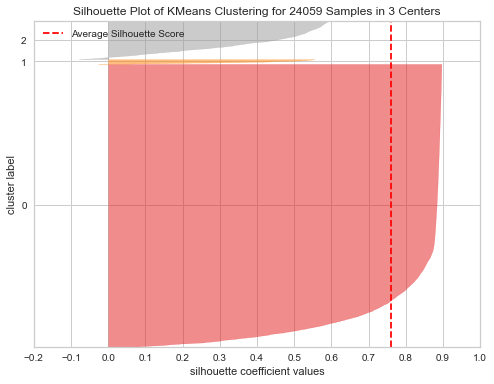

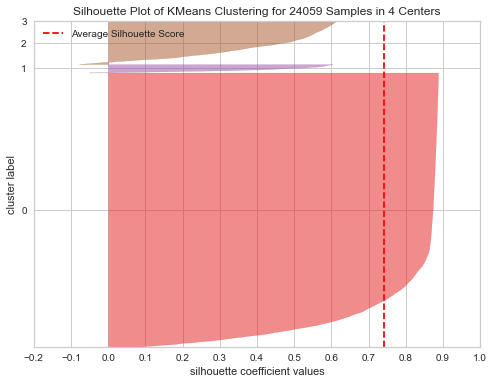

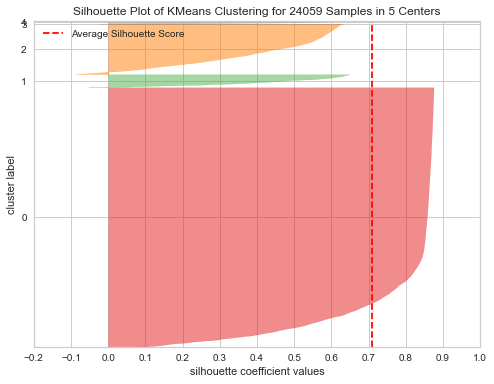

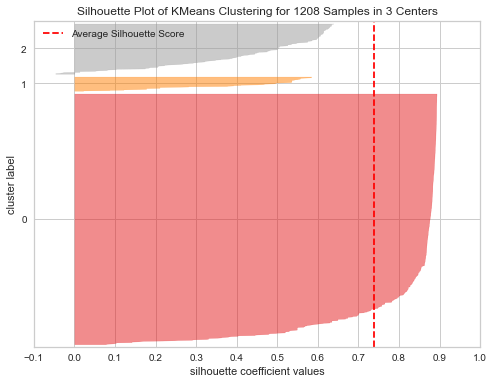

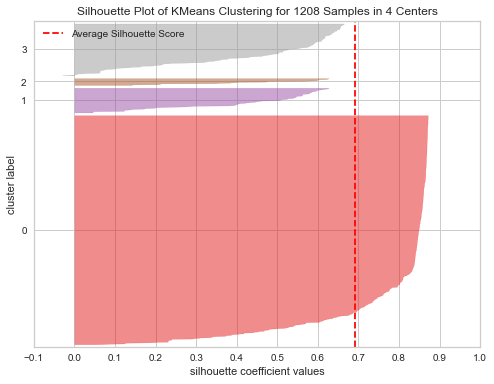

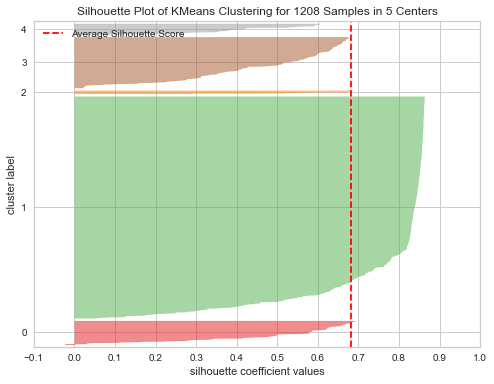

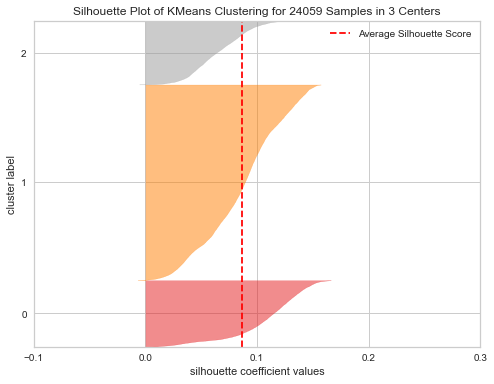

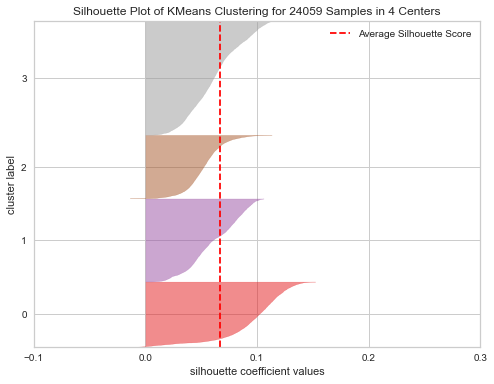

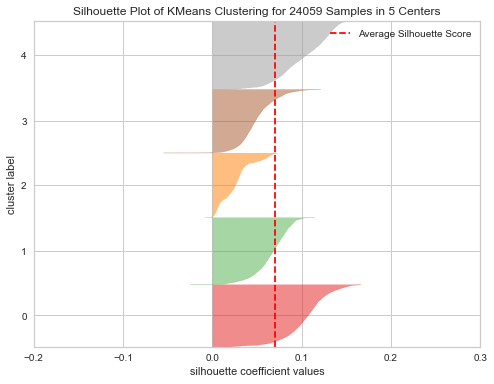

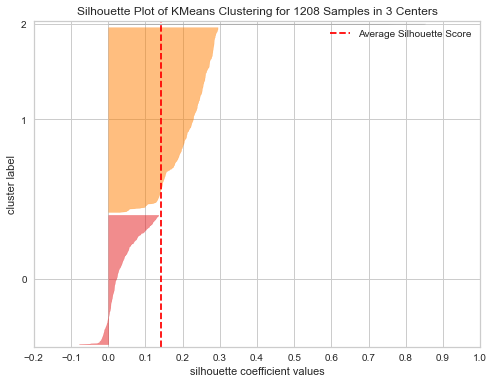

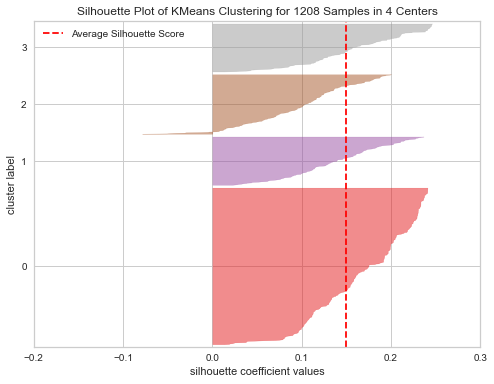

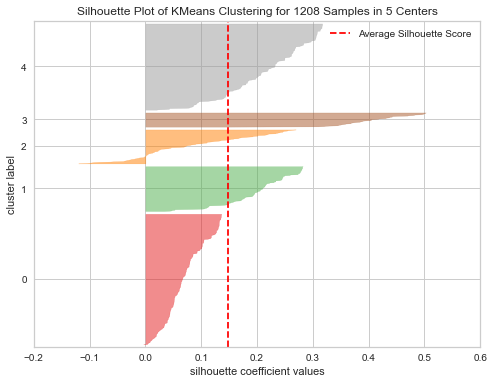

<IPython.core.display.Javascript object>

In [57]:
from yellowbrick.cluster import SilhouetteVisualizer

# For each model, create a Silhouette Visualizer
for model_name in models:
    fig, ax = plt.subplots(figsize=(8,6))
    visualizer = SilhouetteVisualizer(models[model_name], ax=ax)
    visualizer.fit(datasets[names.index(model_name.split('_k')[0])])
    visualizer.finalize()
    plt.show()


<div style="border-top: 3px solid black"></div>  


<a id='section_id'></a>
<h3 style="color:blue">Bar Chart of Features based on Groupings</h3>
<hr>
<h4 style="color:orange">OBSERVATION</h4>
<p style="font-size:15px">
Bar charts based on grouping can be a great way to visualize and understand the characteristics of different clusters in your data.

For each feature in your data, a bar chart can be generated where the x-axis represents the different clusters and the y-axis represents the average (or sometimes sum) value of that feature within each cluster. Each bar in the chart corresponds to a cluster, and the height of the bar corresponds to the average value of the feature for all data points within that cluster.

How to interpret these charts:

Compare across features: You can compare the height of the bars across different features to understand how the clusters differ. For instance, if one cluster has a much higher average value for a particular feature compared to the other clusters, it indicates that this feature is characteristic of that cluster.

Compare across clusters: You can also compare the height of the bars within a single feature to understand how the clusters are differentiated by that feature. For instance, if the bars for a feature are approximately the same height across all clusters, it suggests that this feature does not significantly differentiate the clusters.

Identify key characteristics: If a cluster has high values for a particular set of features, it suggests that these features are key characteristics of that cluster.

Remember, these charts give you an aggregated view of the data, so while they provide useful insights into the overall characteristics of the clusters, they might not capture all the nuances of the data within each cluster.
</p>
<ol>
<li>
<b>Sub-section Title :</b>
<p>Description for this sub-section goes here.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<p></p>
<li>
<b>Another Sub-section Title :</b>
<p>Description for this sub-section goes here.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<!-- Add as many list items as you need -->
</ol>
<a href='#top'>🔼</a>


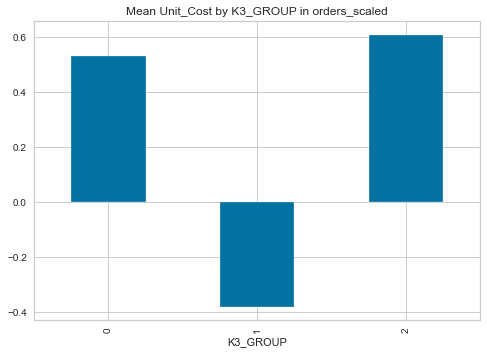

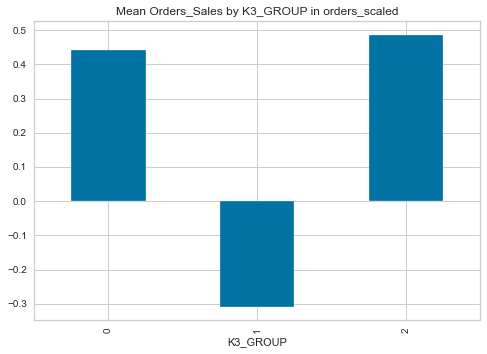

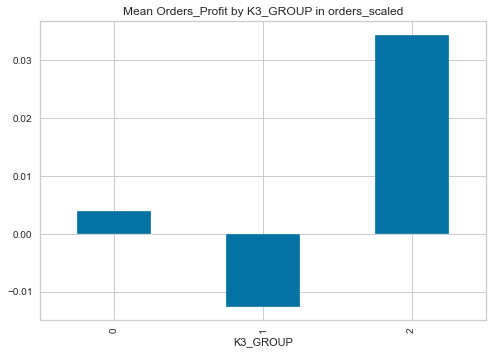

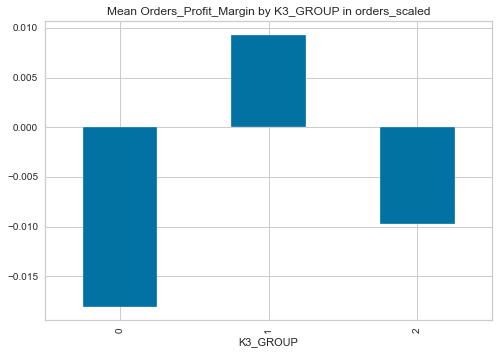

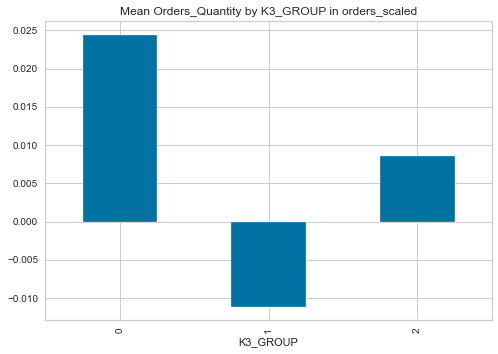

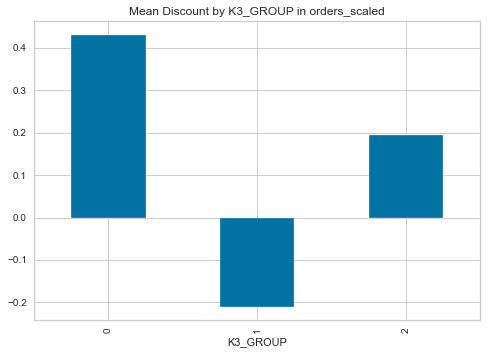

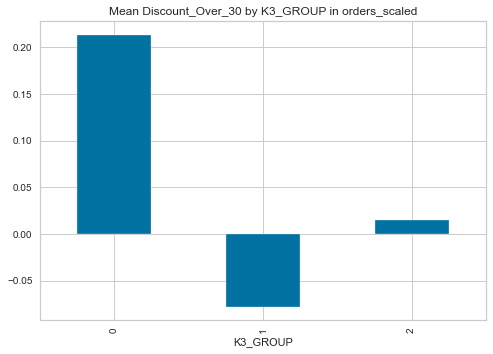

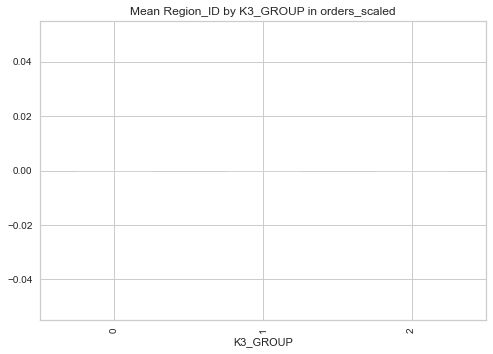

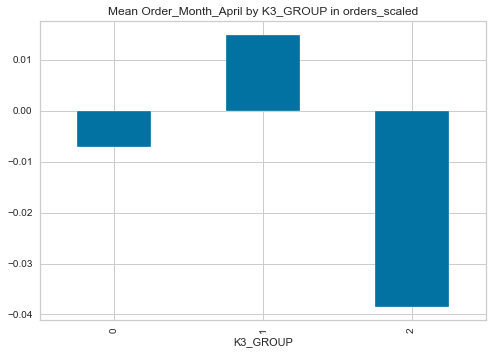

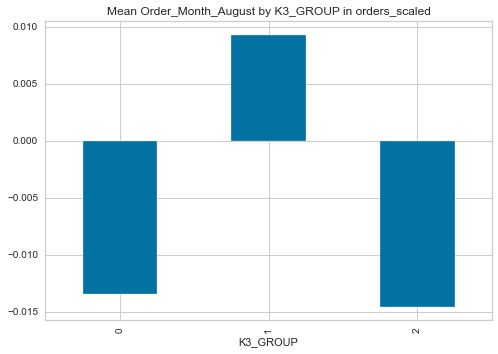

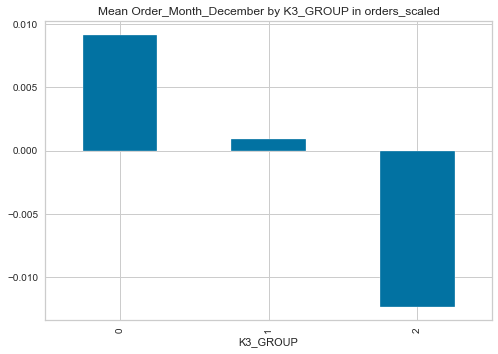

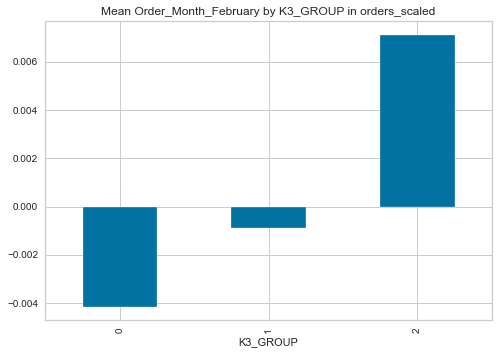

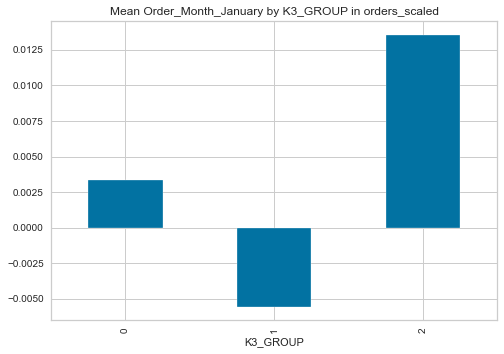

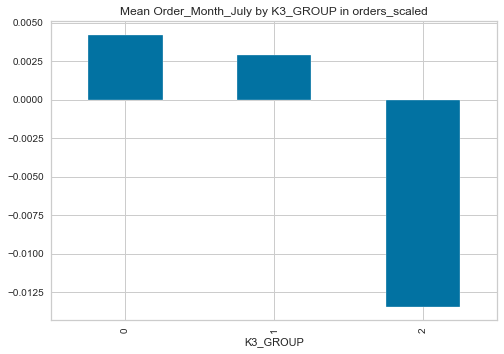

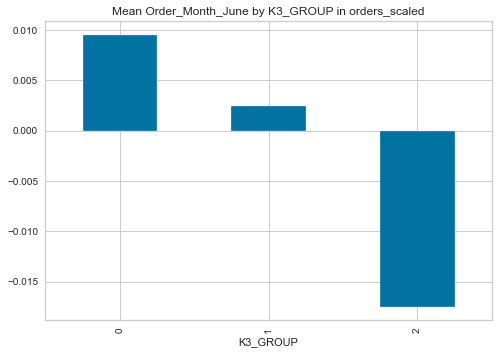

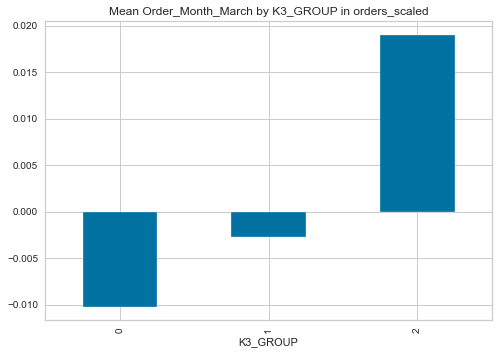

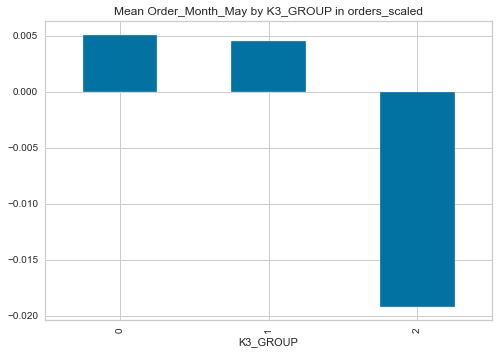

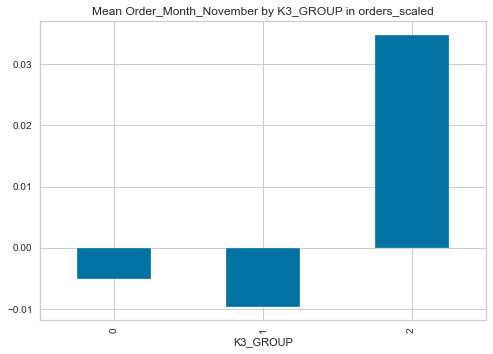

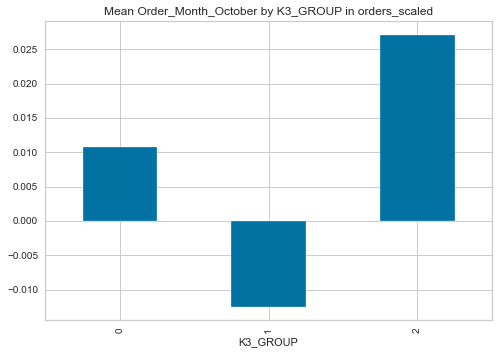

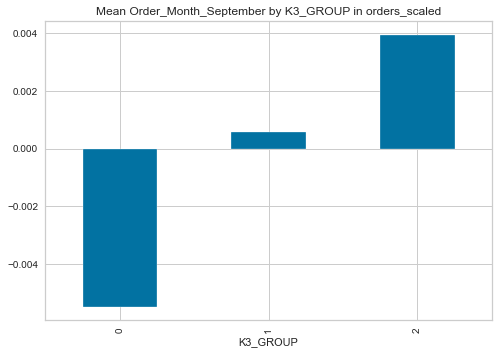

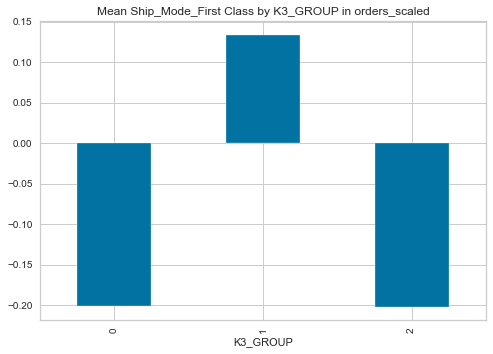

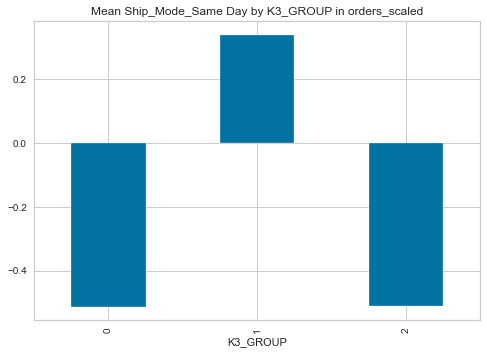

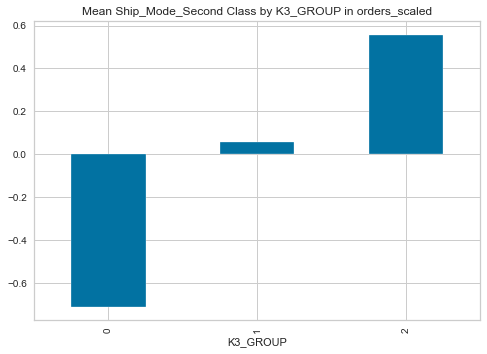

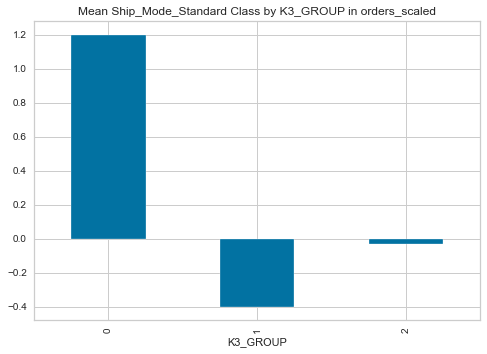

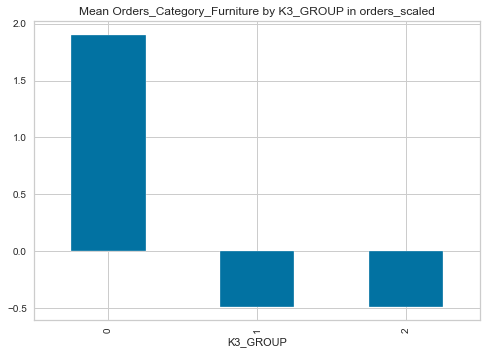

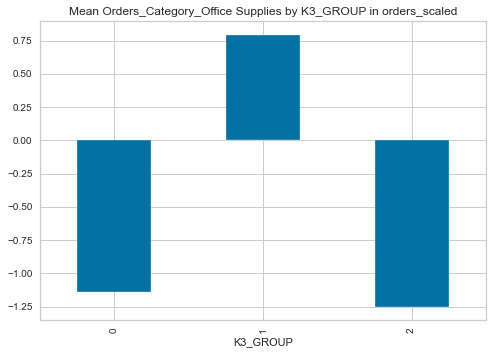

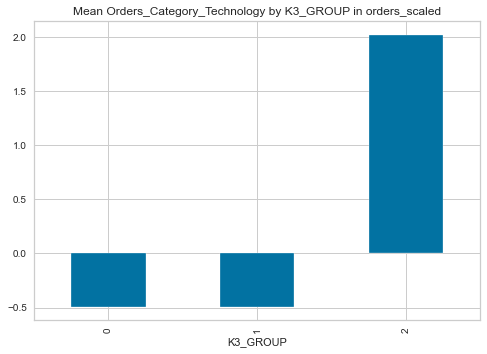

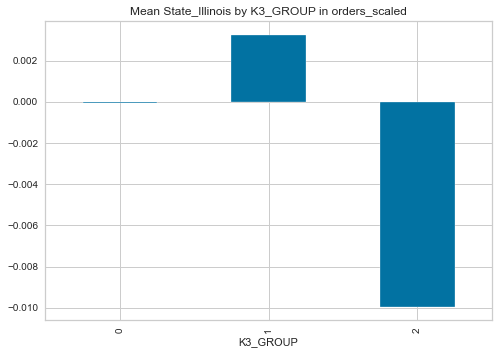

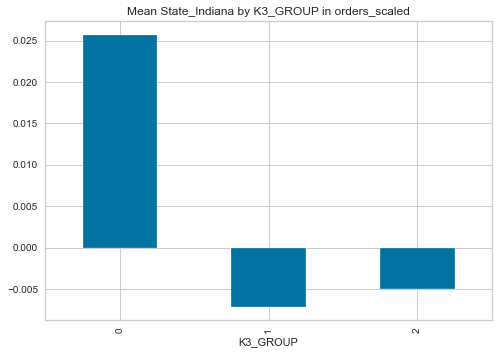

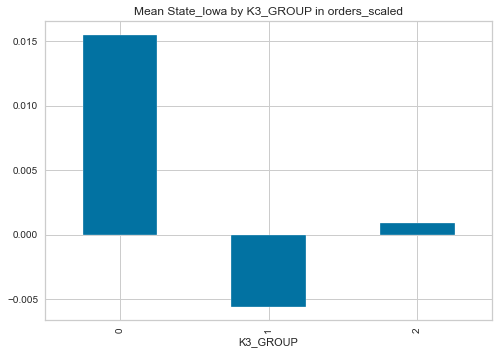

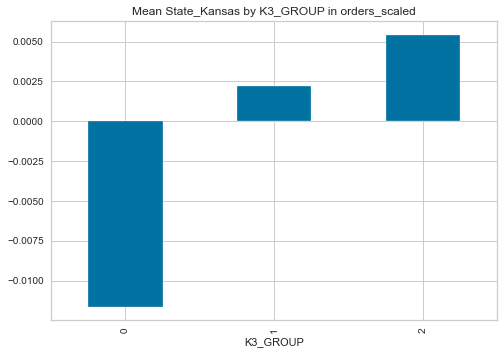

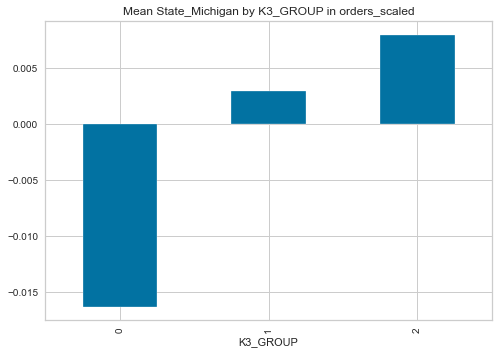

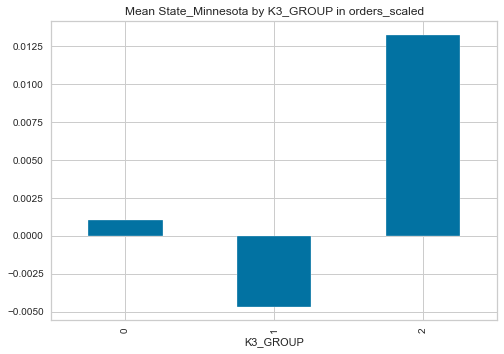

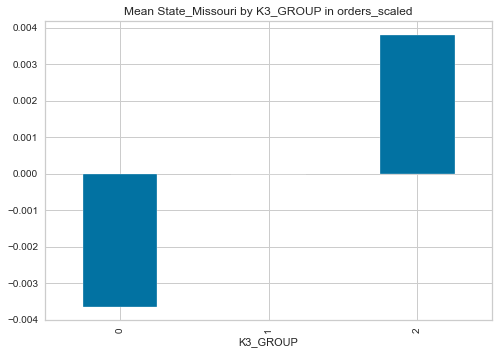

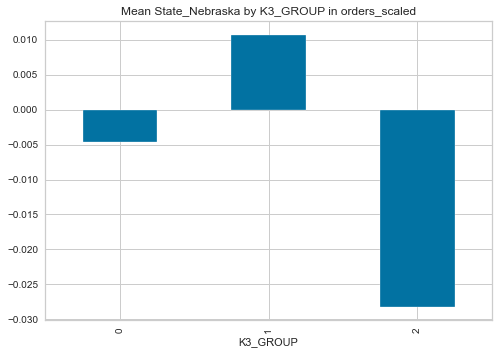

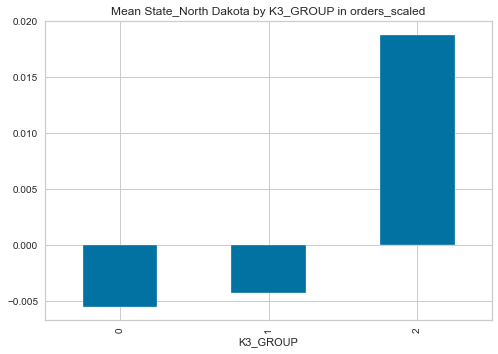

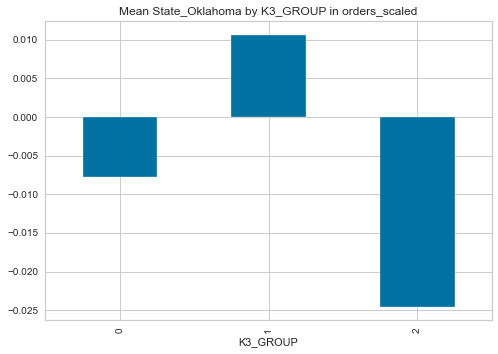

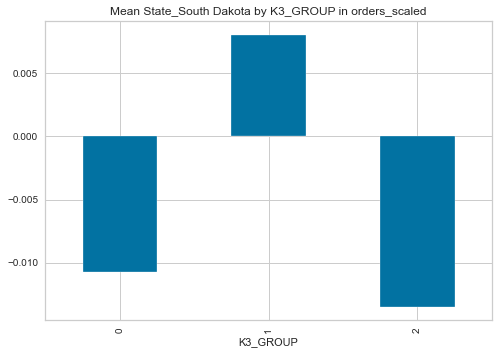

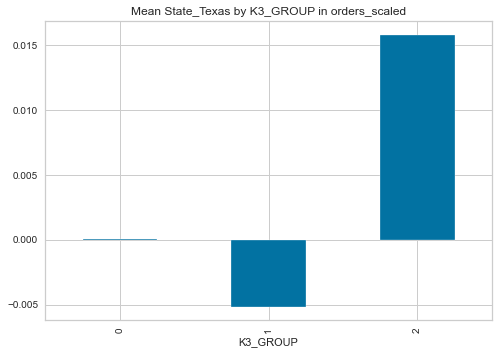

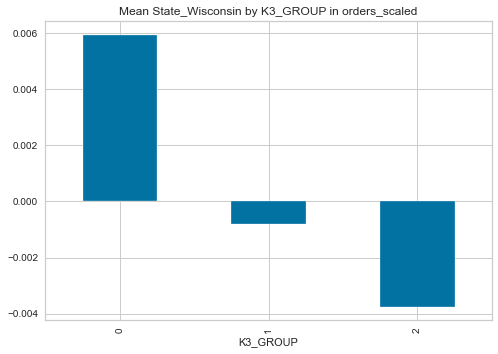

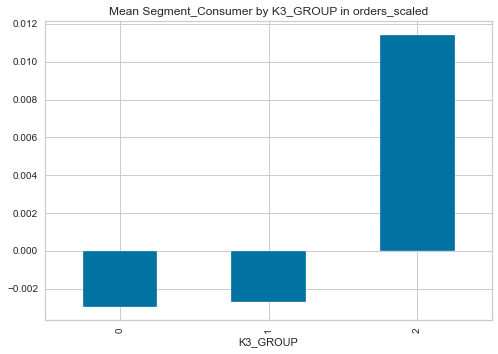

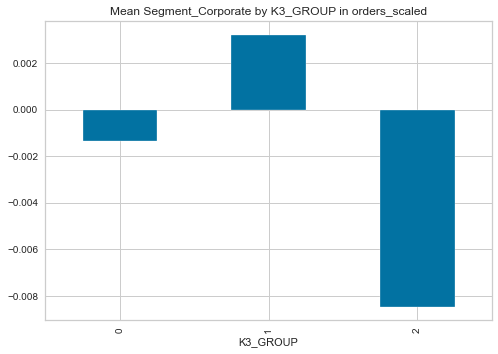

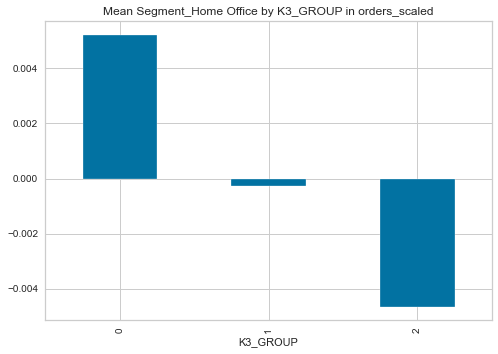

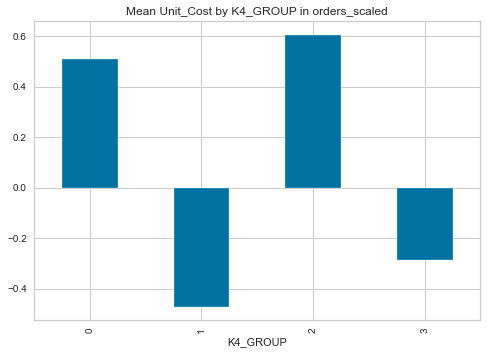

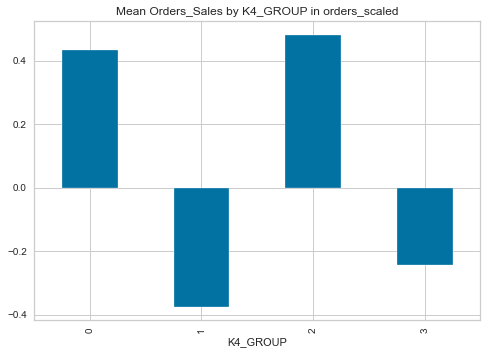

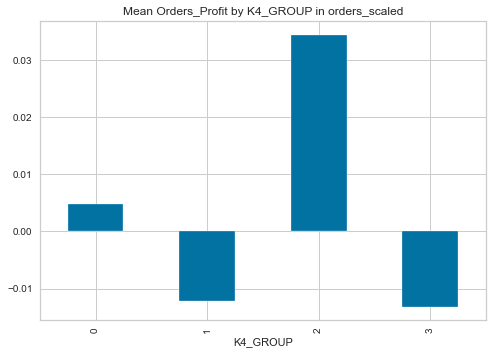

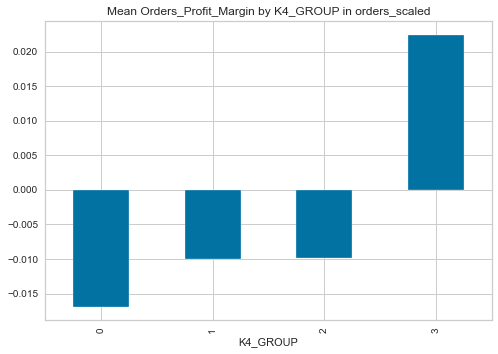

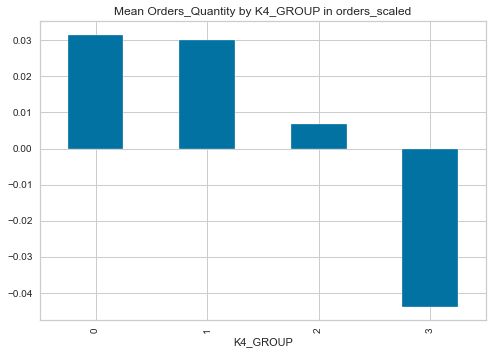

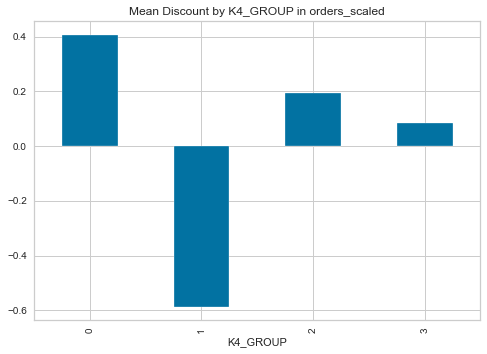

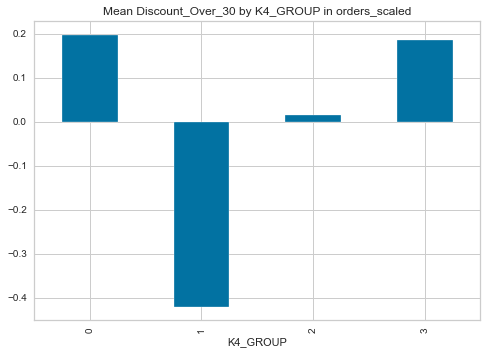

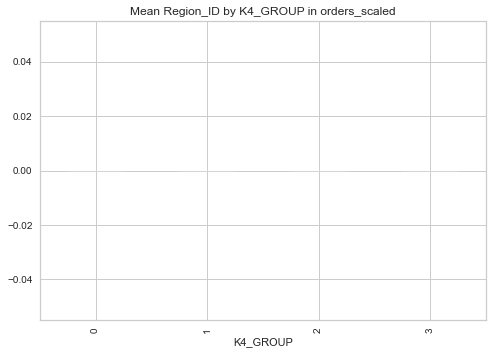

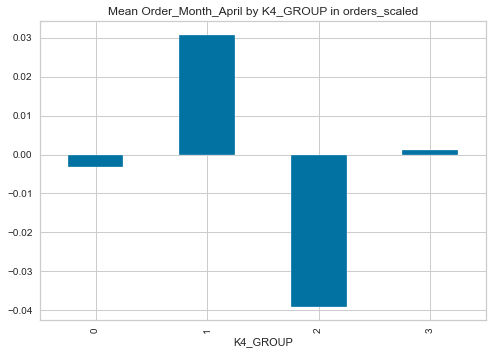

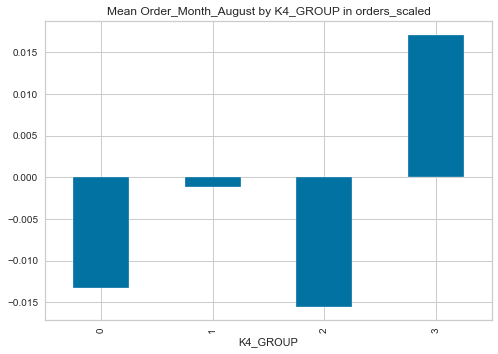

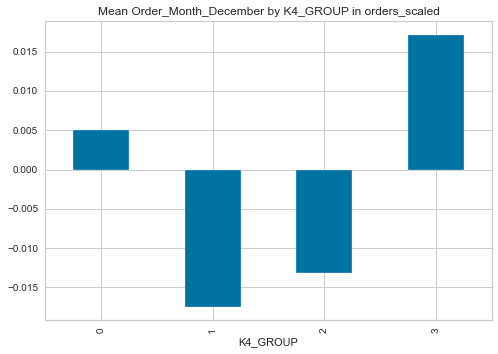

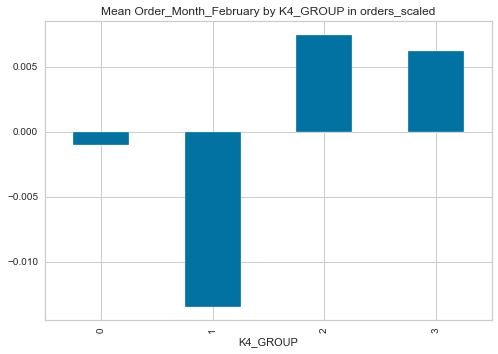

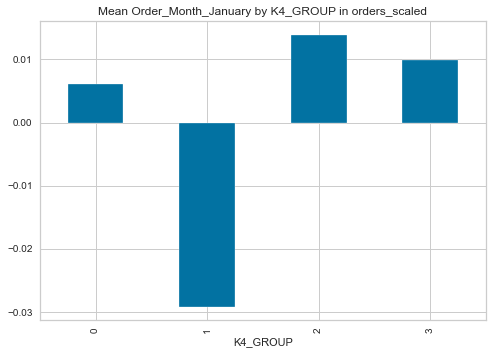

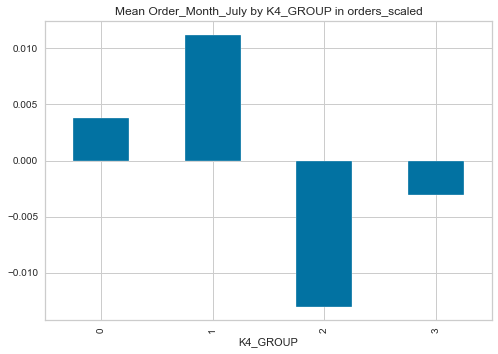

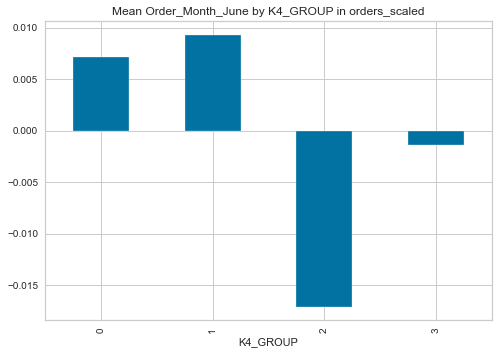

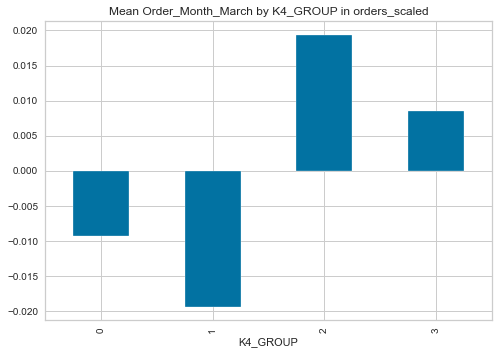

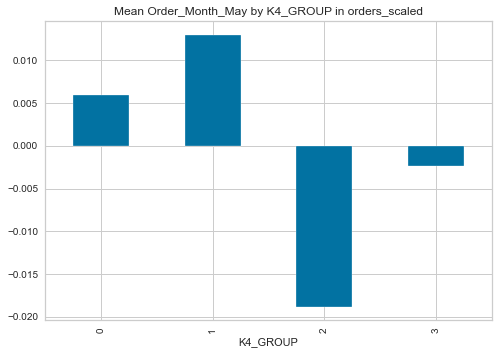

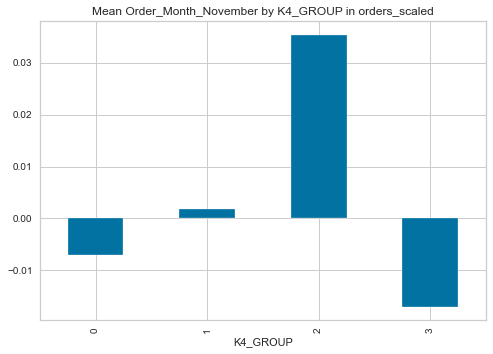

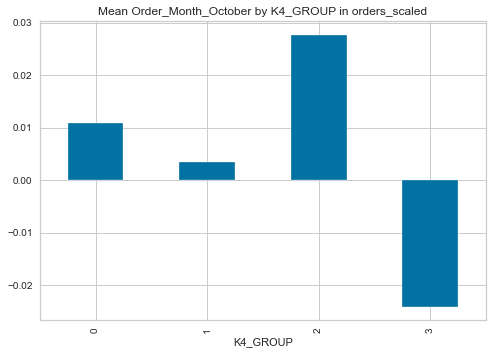

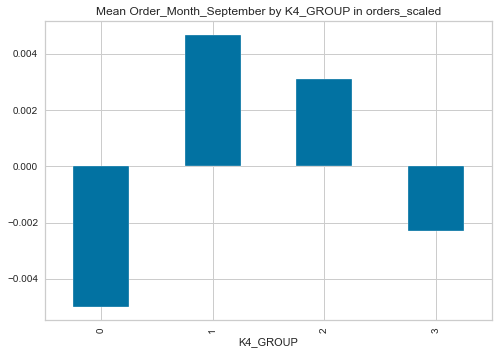

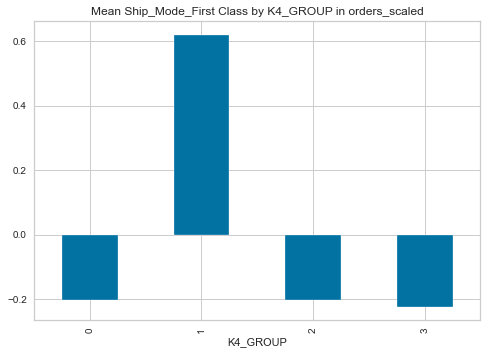

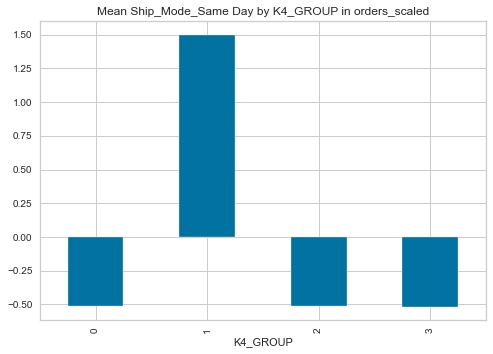

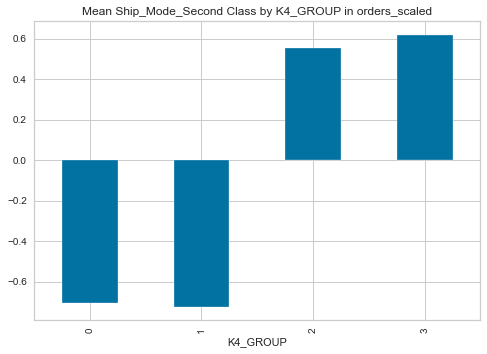

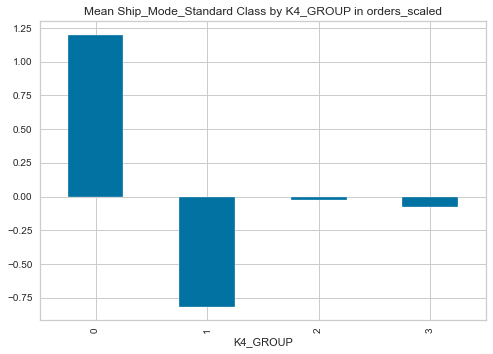

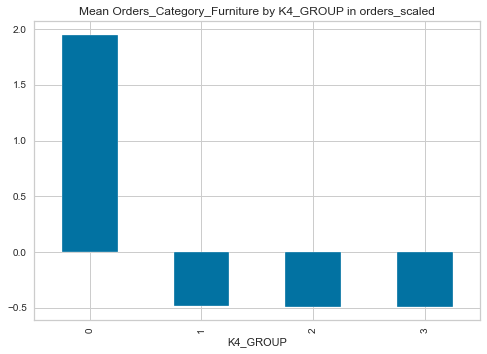

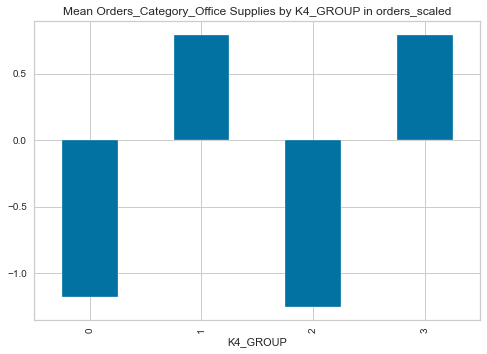

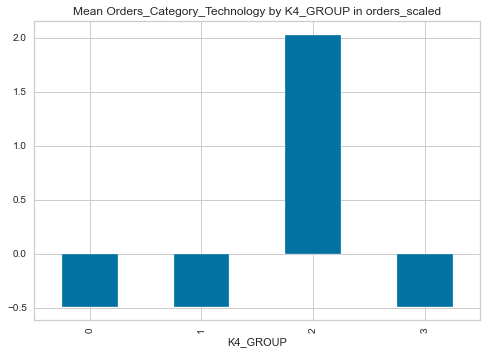

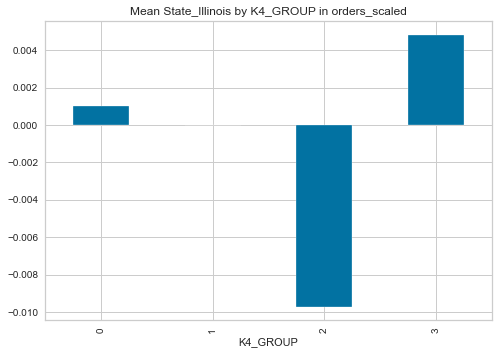

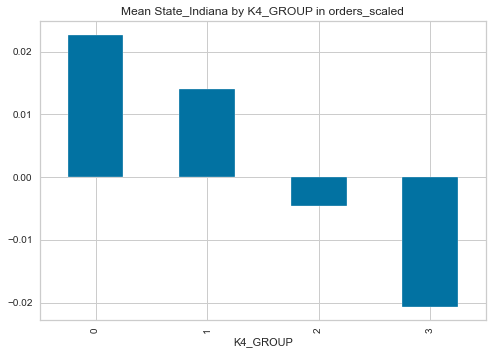

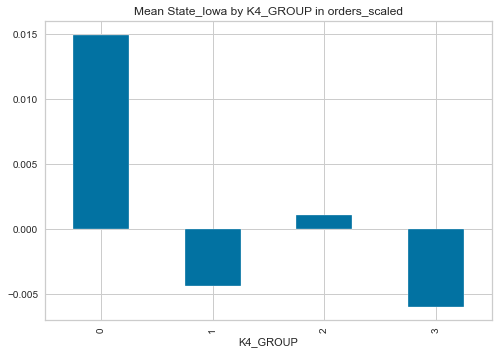

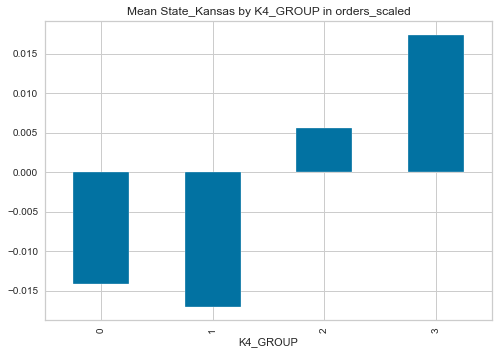

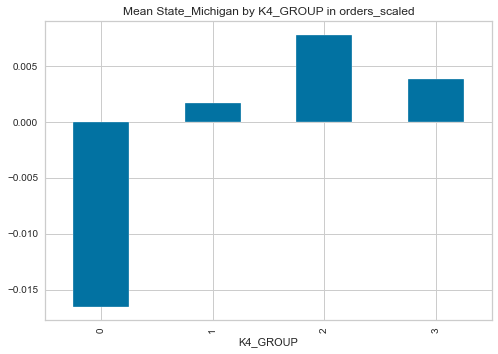

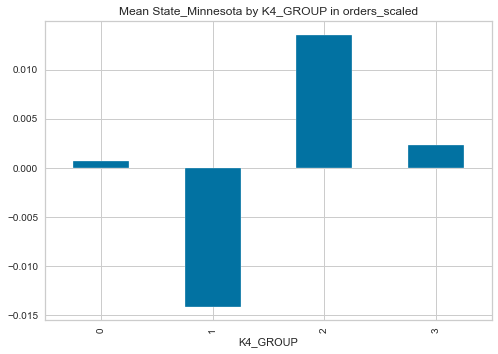

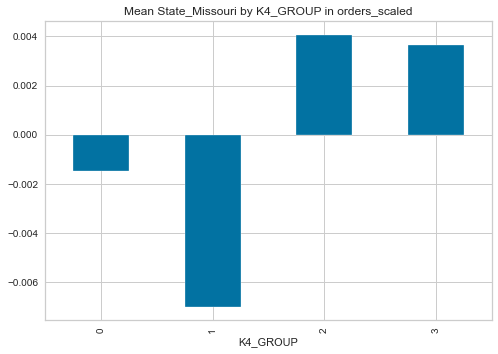

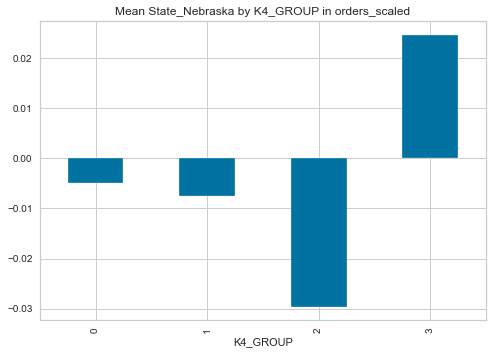

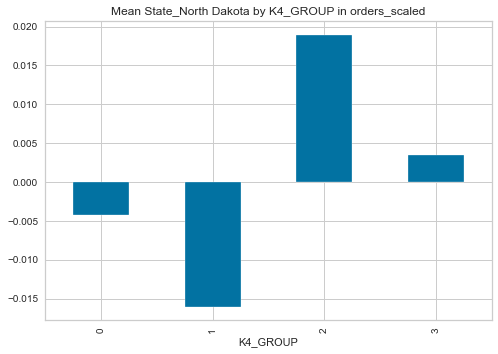

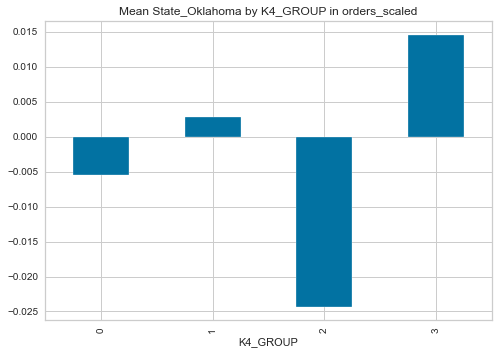

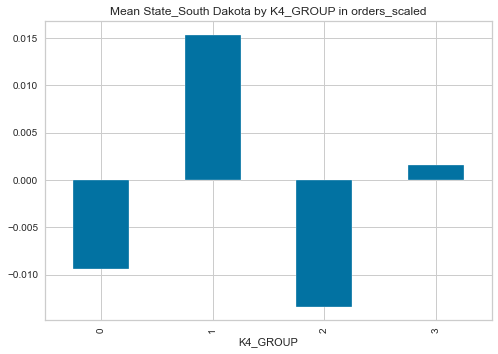

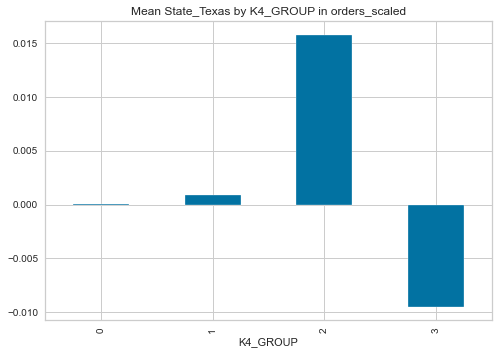

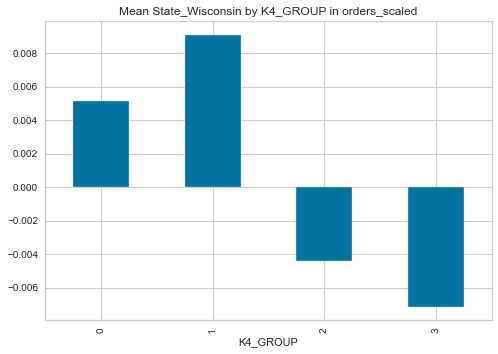

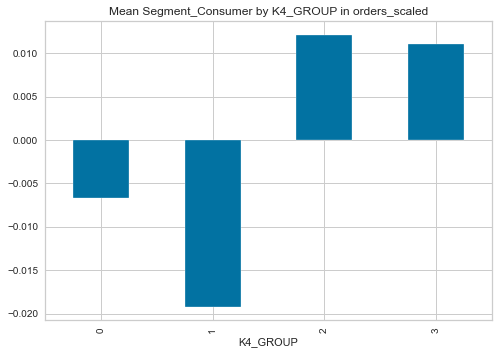

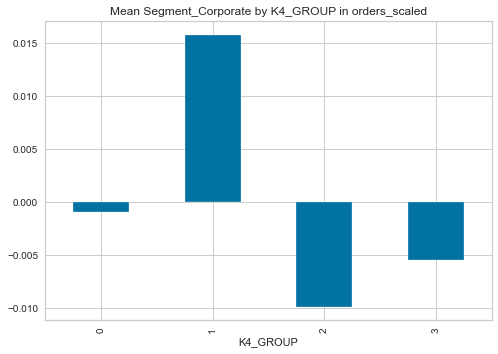

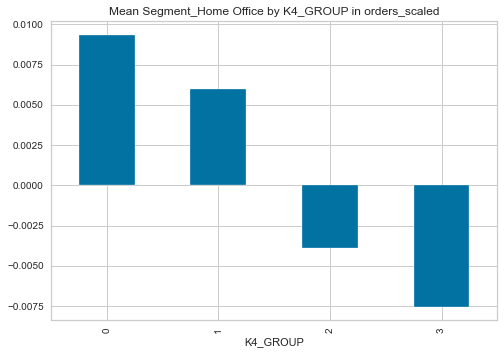

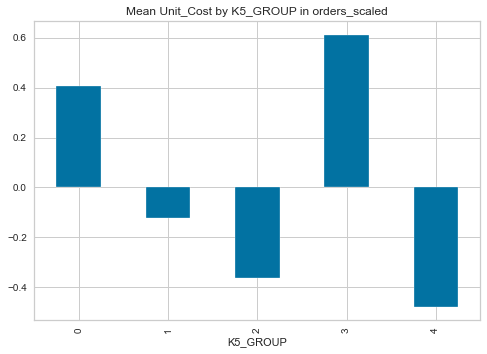

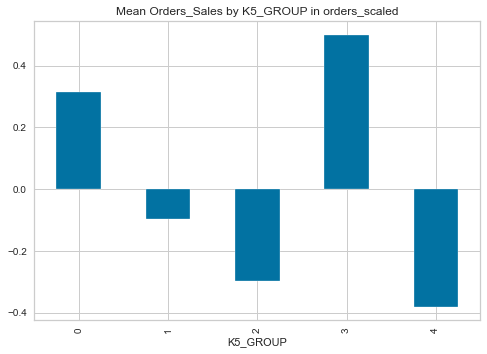

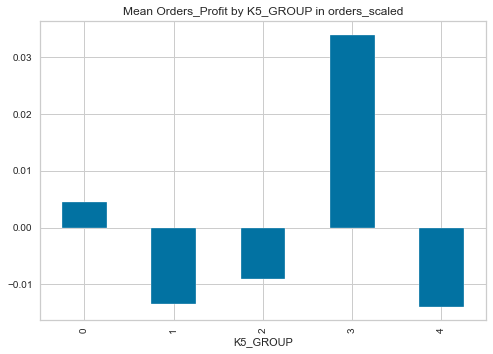

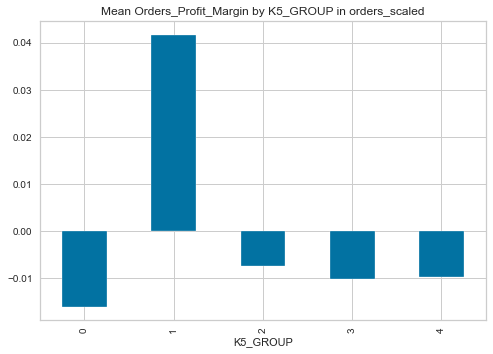

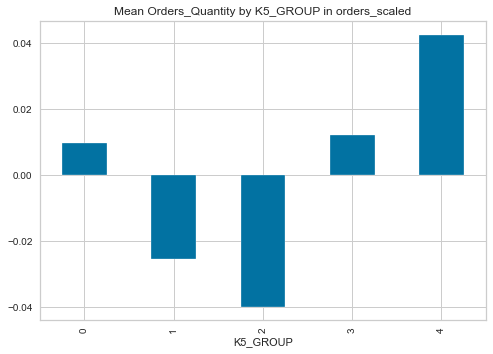

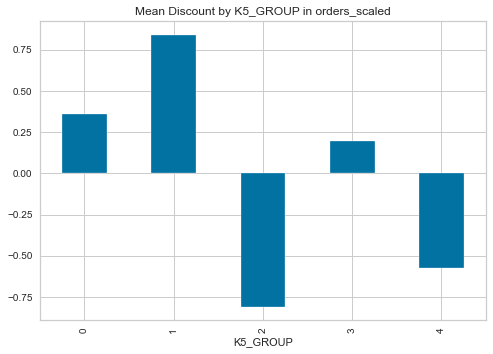

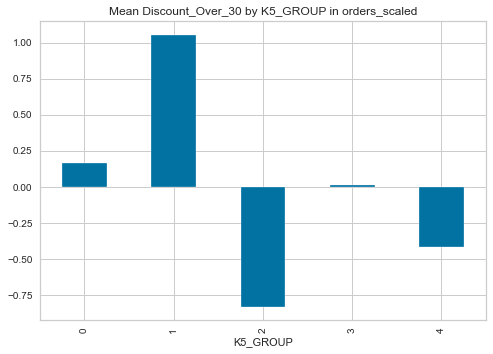

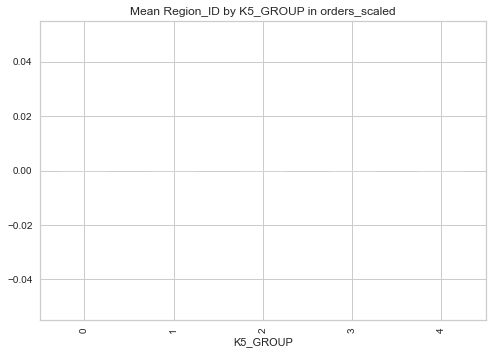

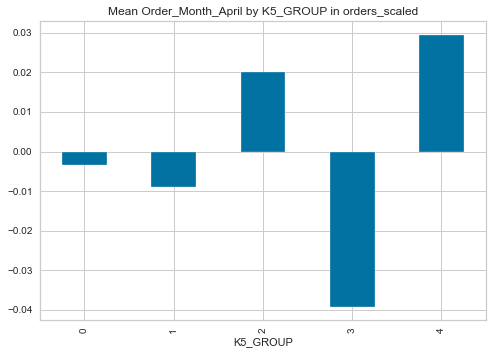

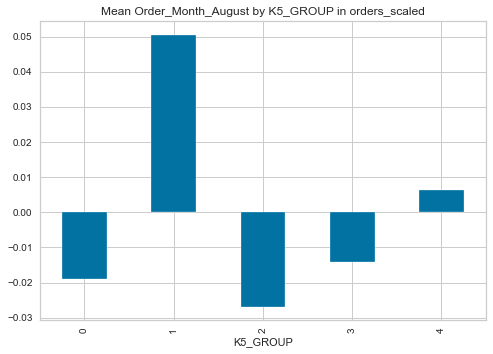

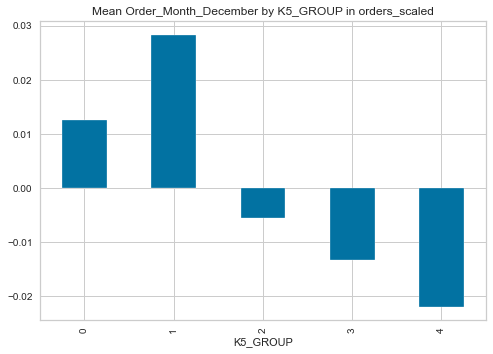

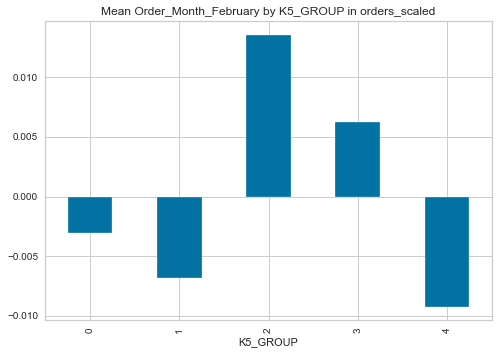

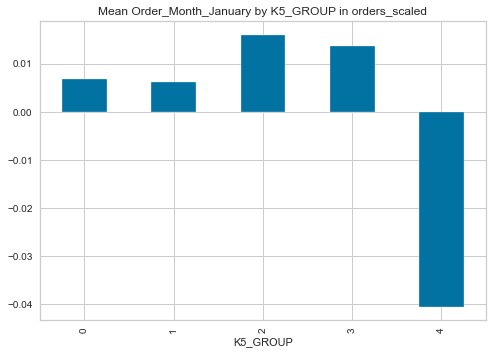

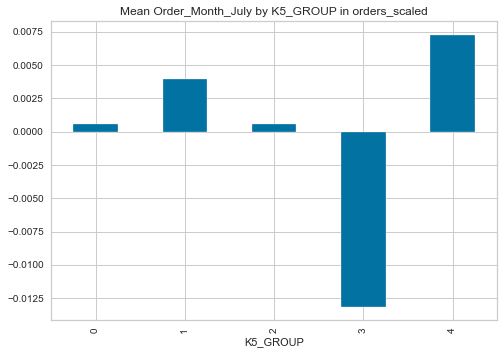

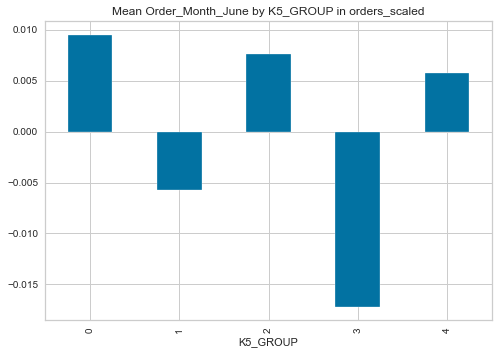

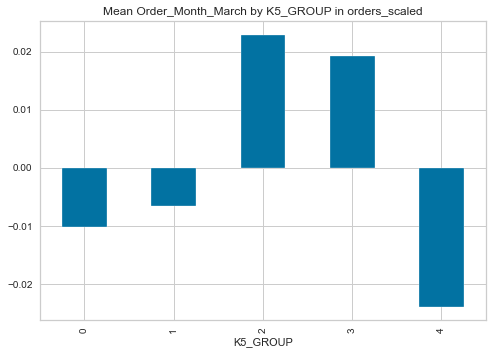

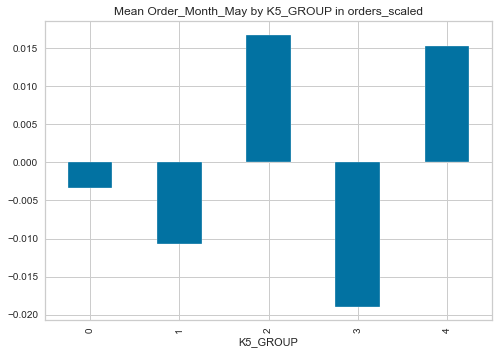

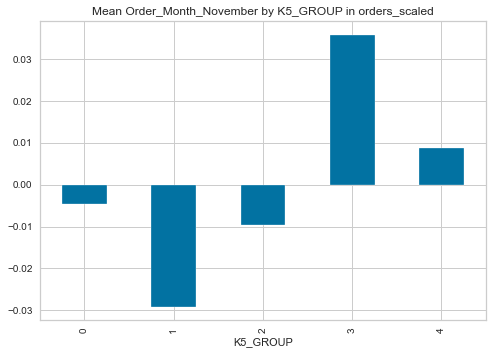

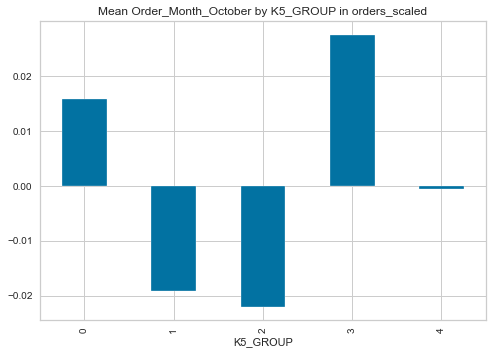

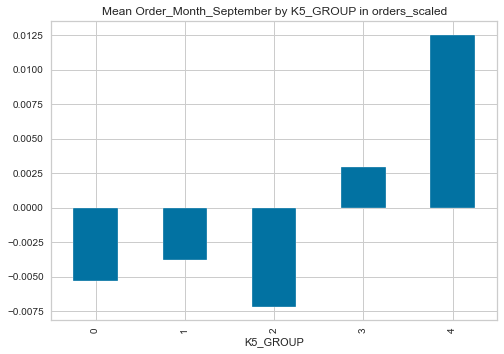

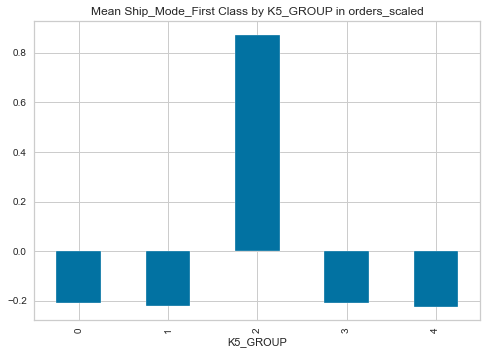

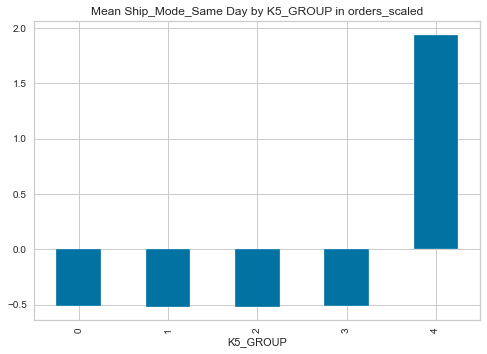

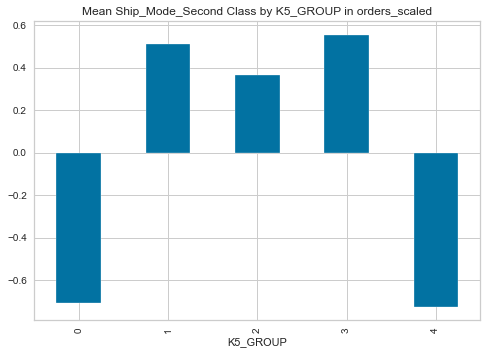

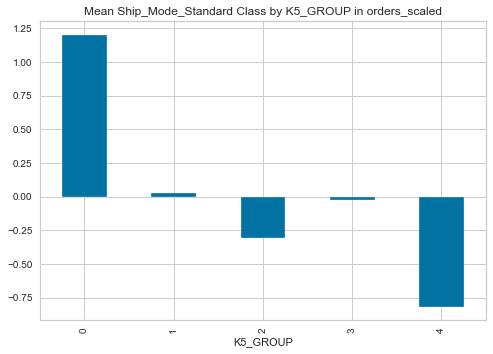

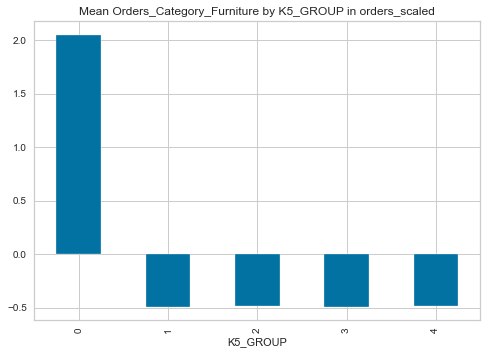

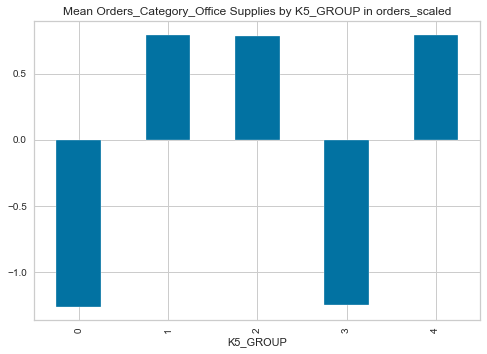

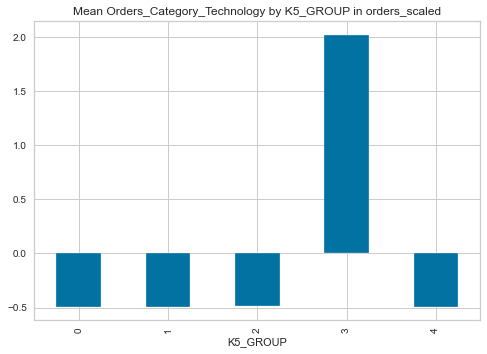

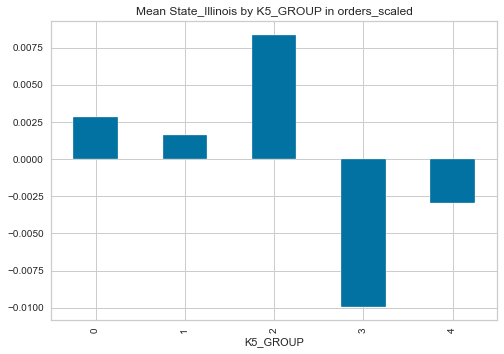

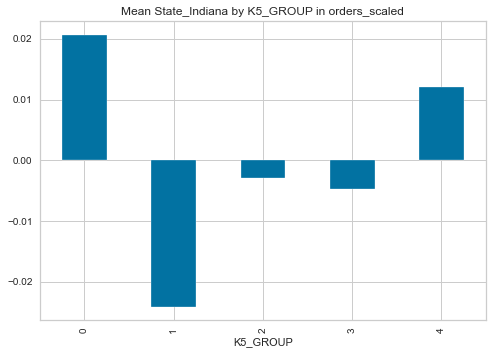

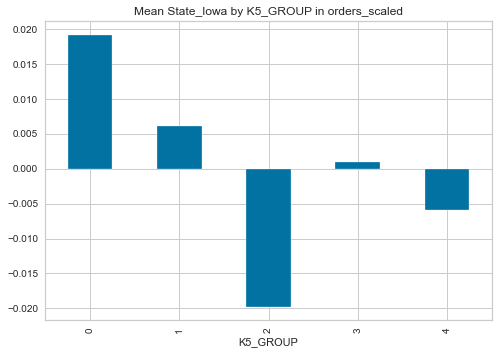

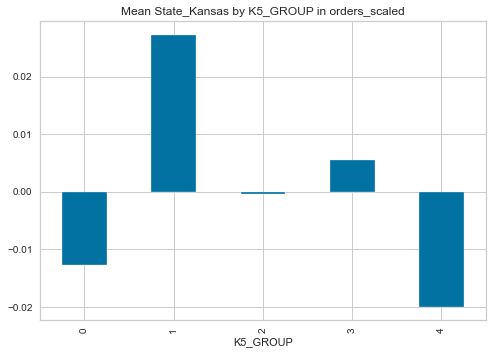

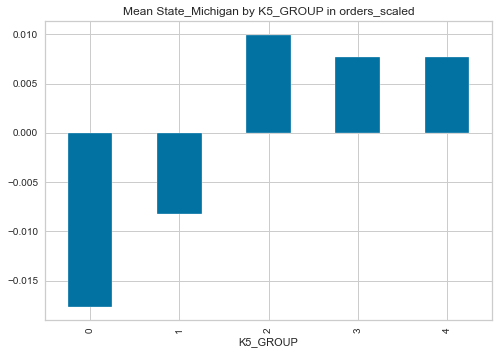

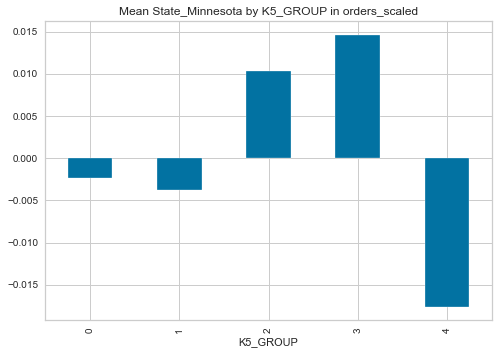

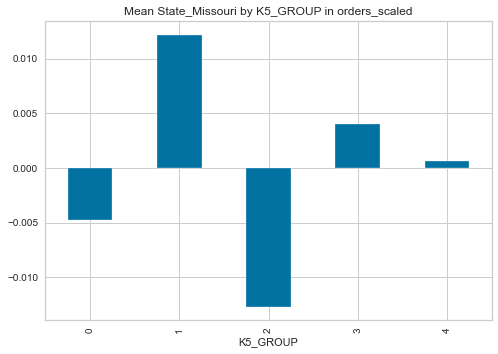

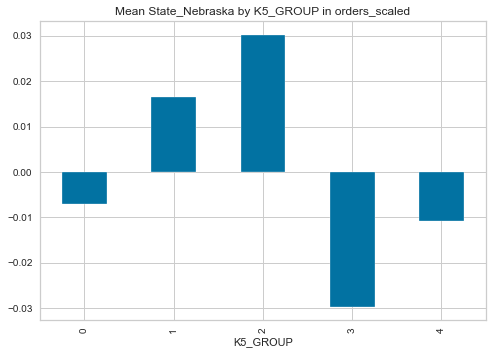

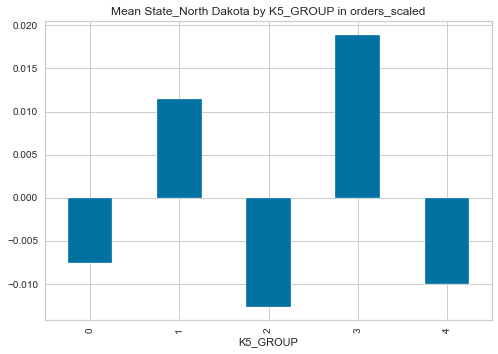

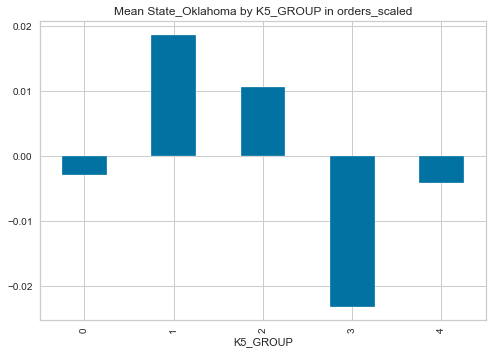

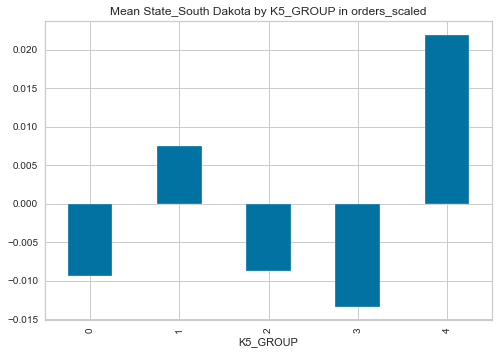

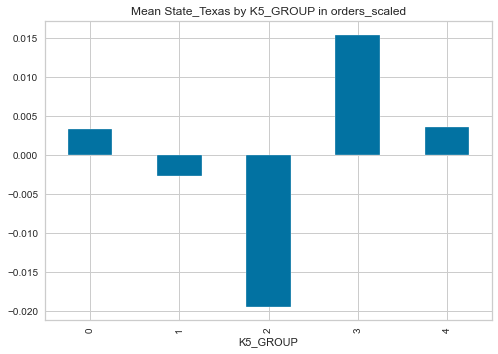

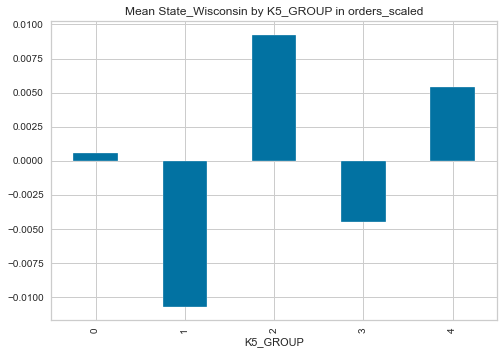

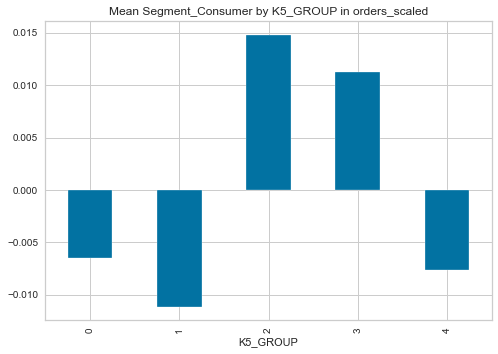

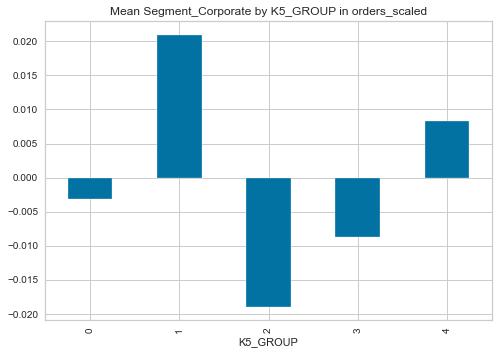

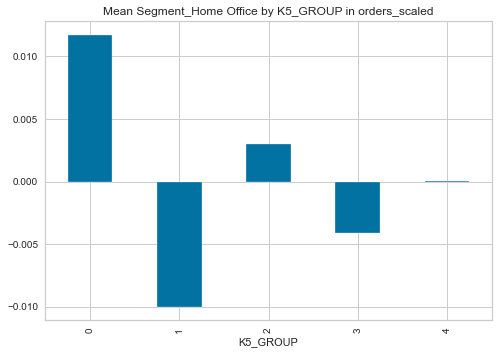

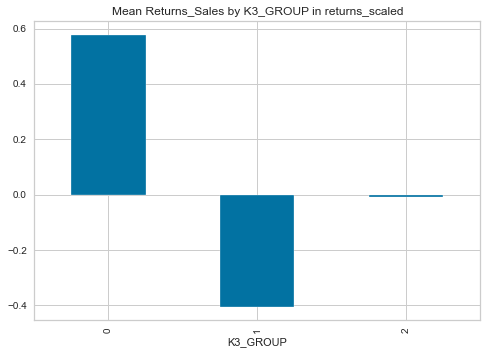

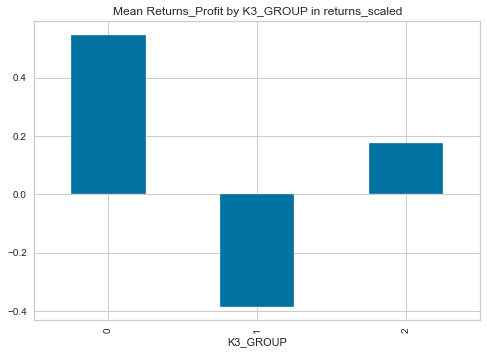

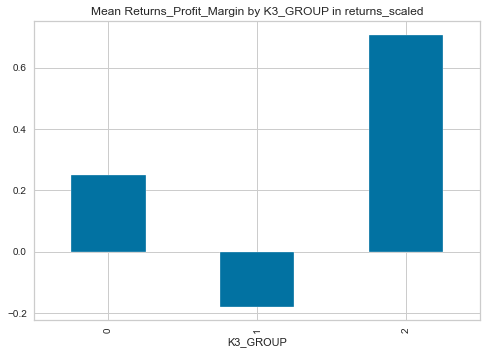

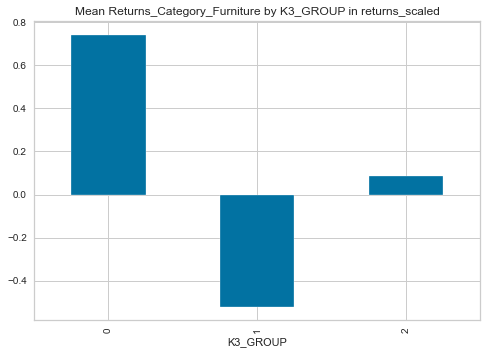

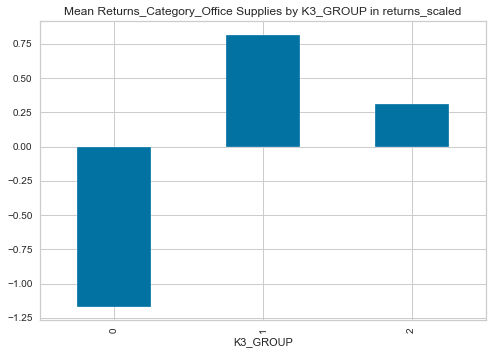

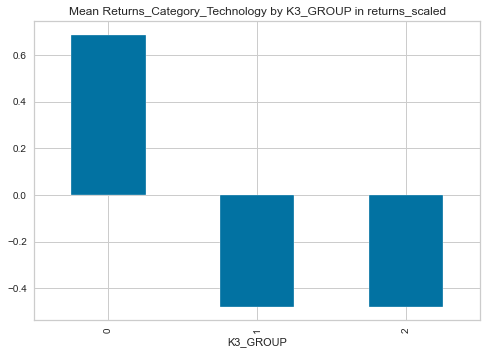

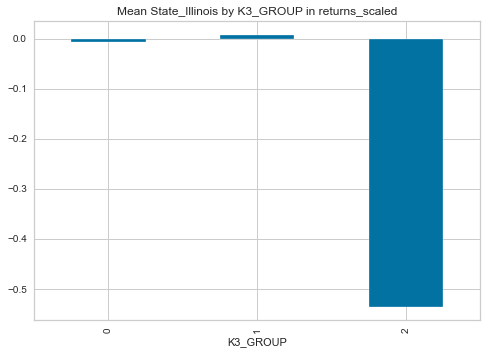

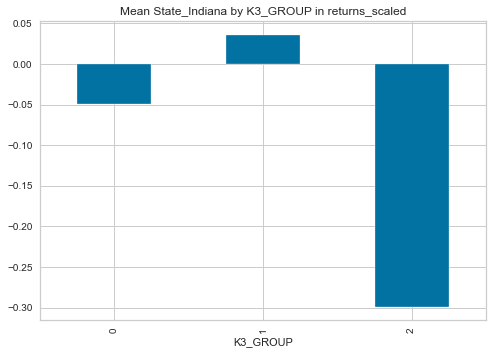

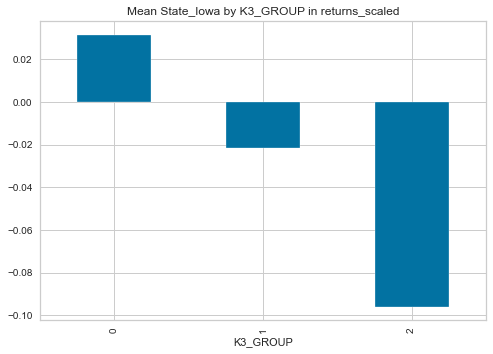

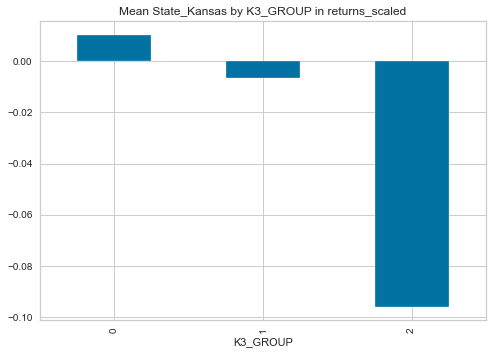

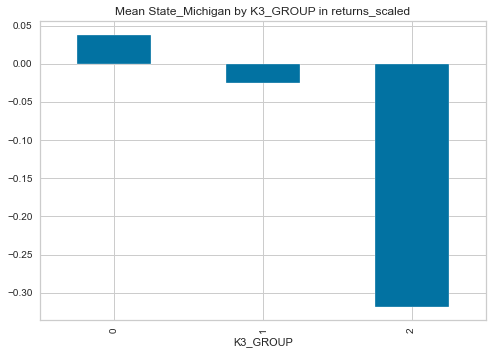

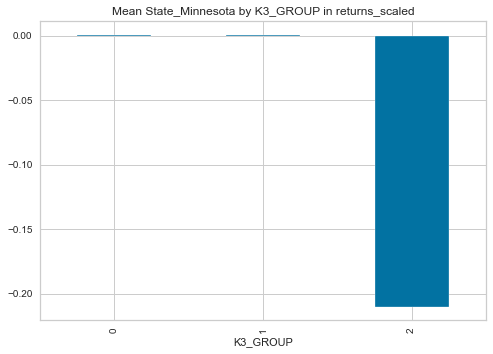

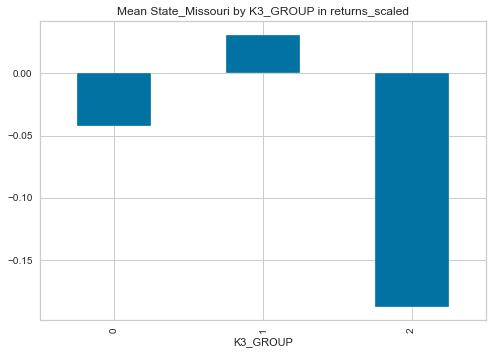

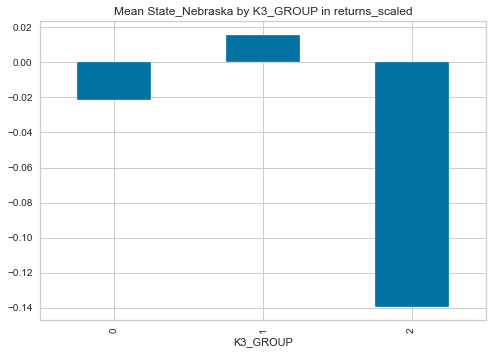

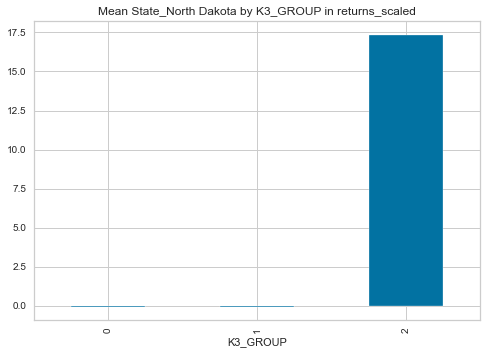

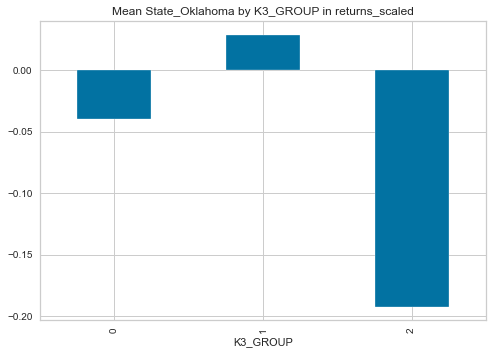

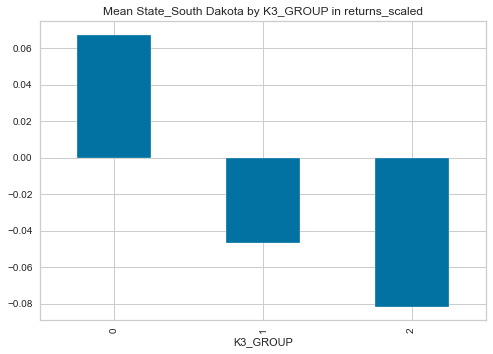

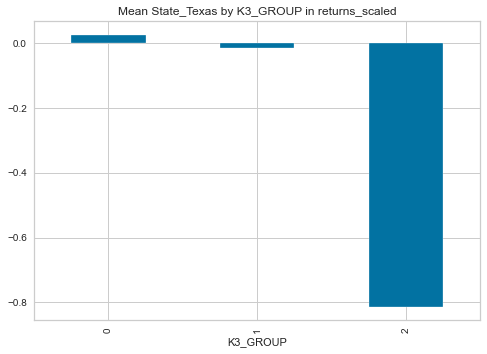

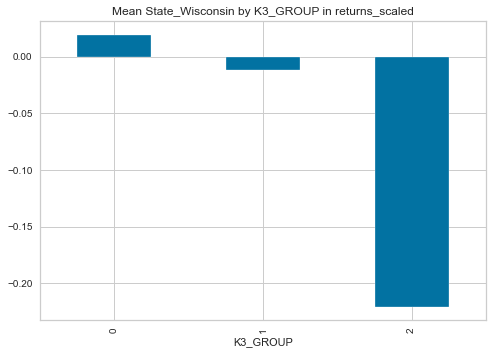

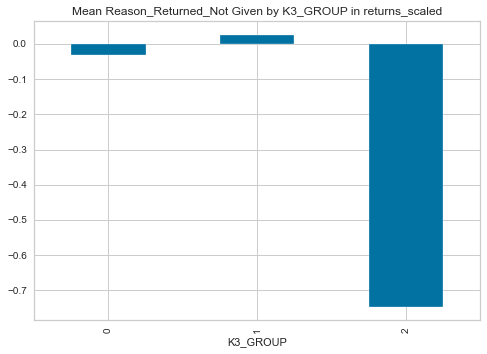

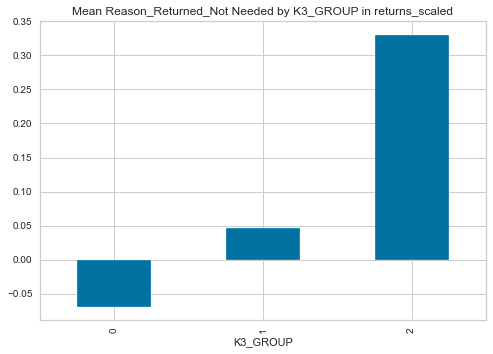

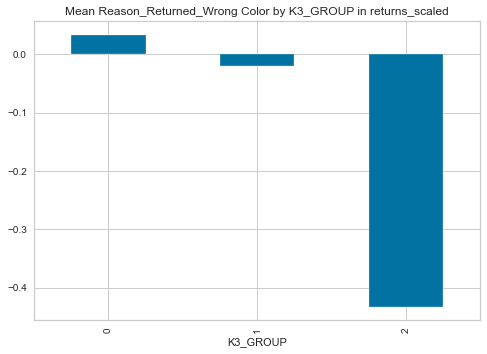

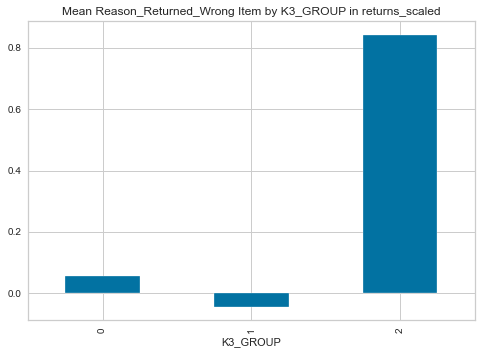

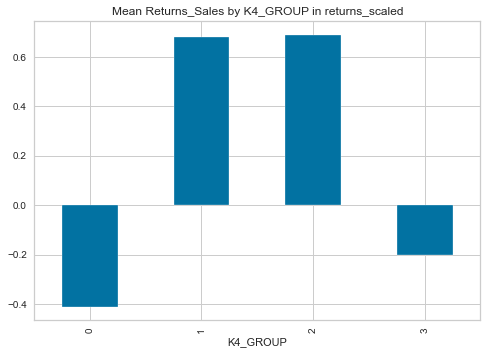

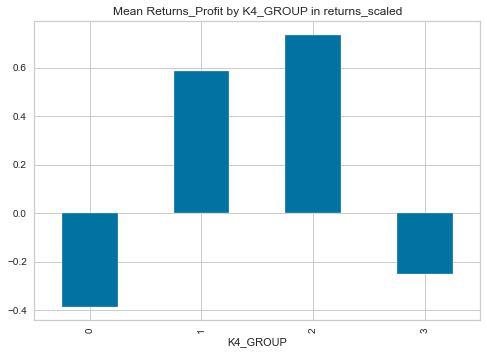

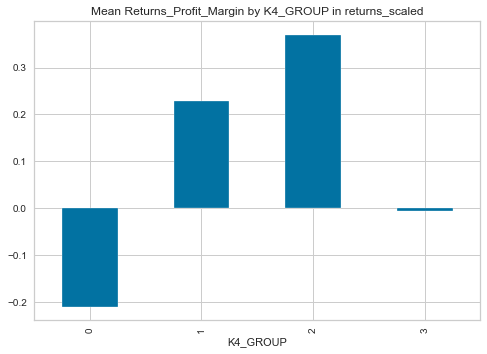

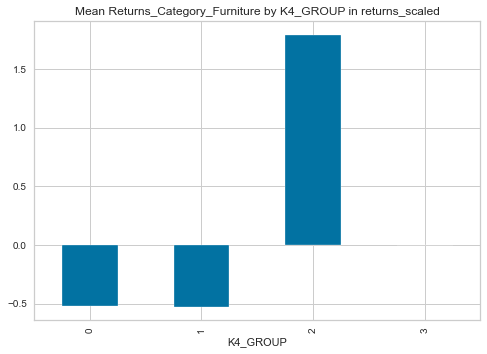

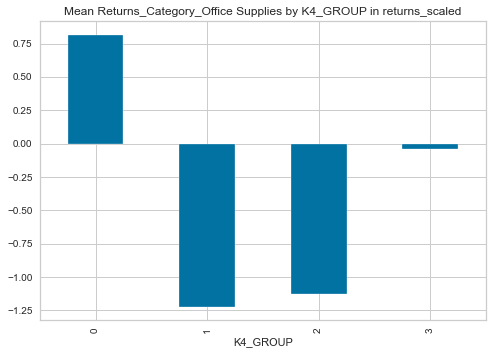

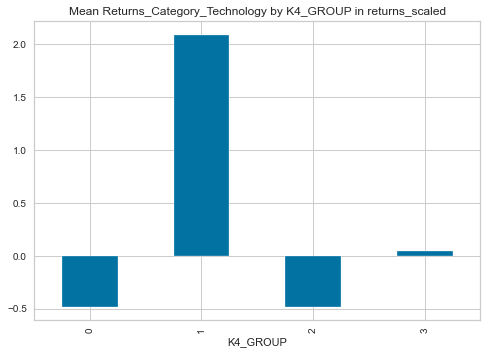

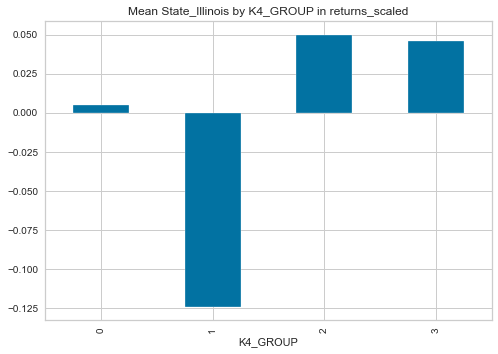

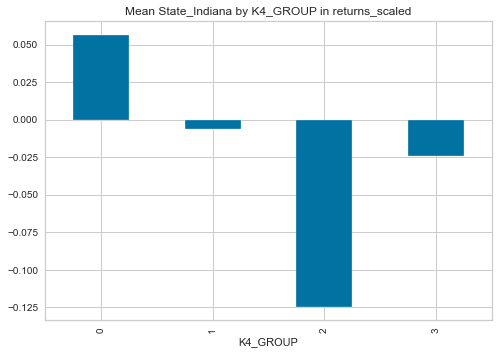

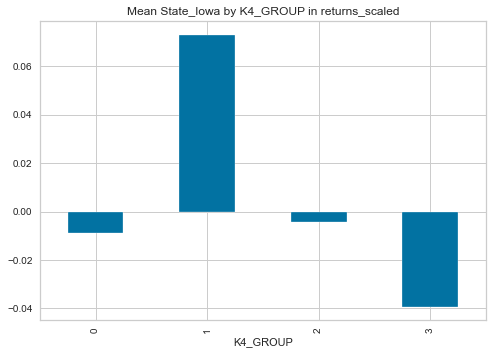

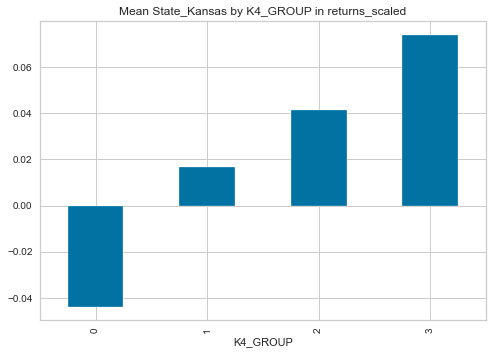

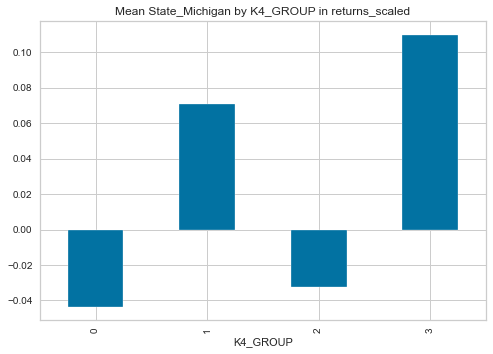

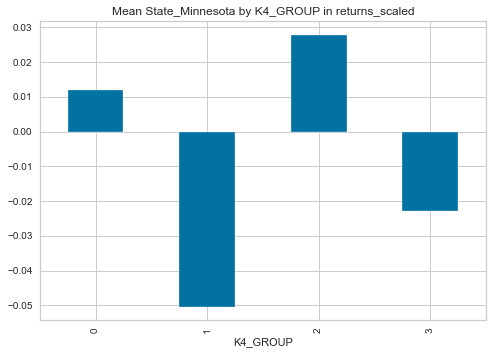

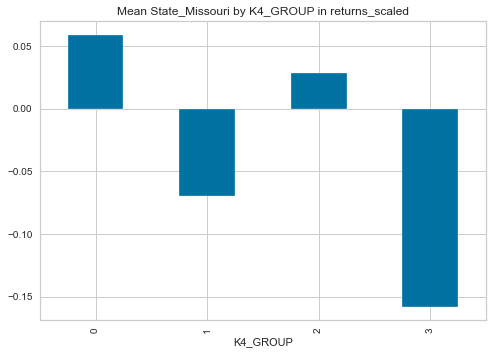

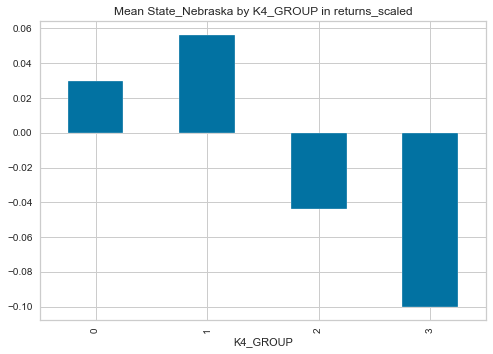

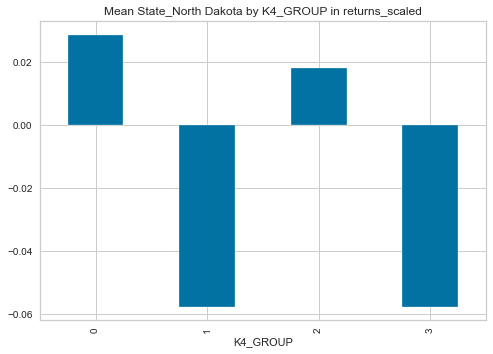

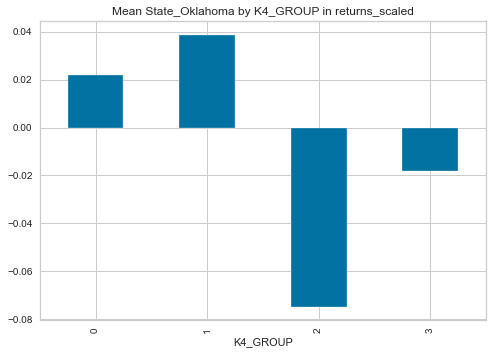

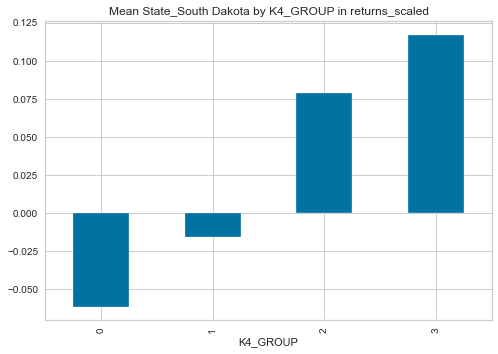

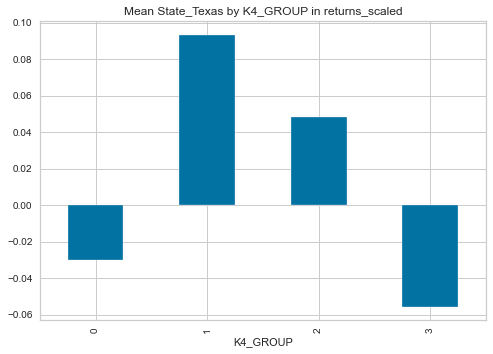

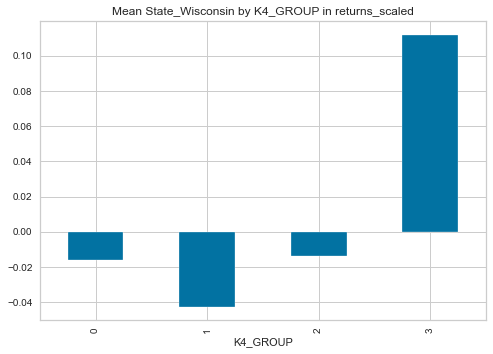

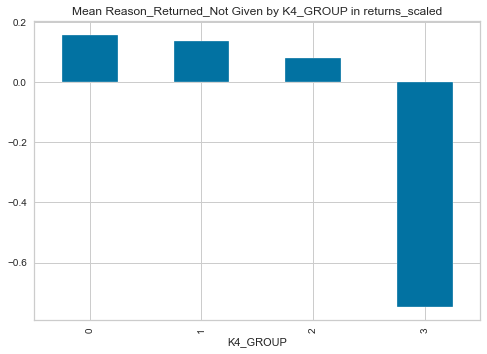

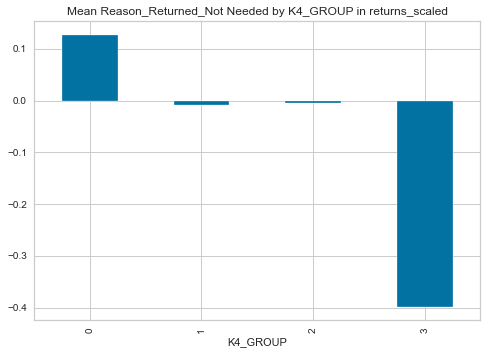

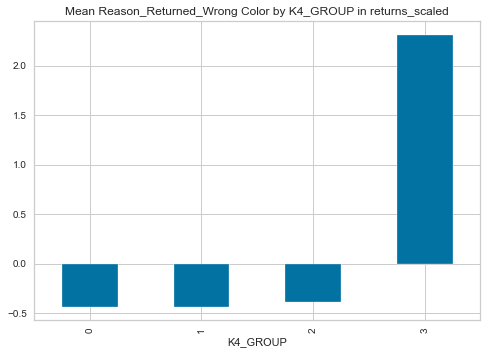

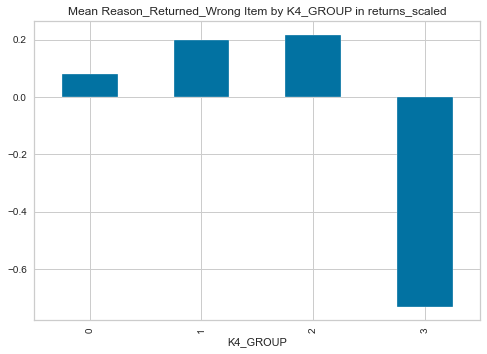

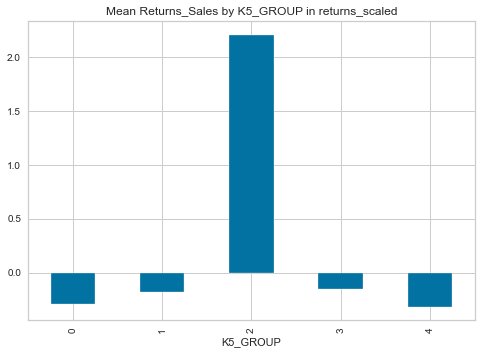

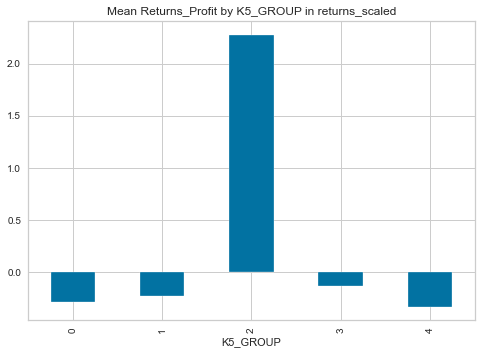

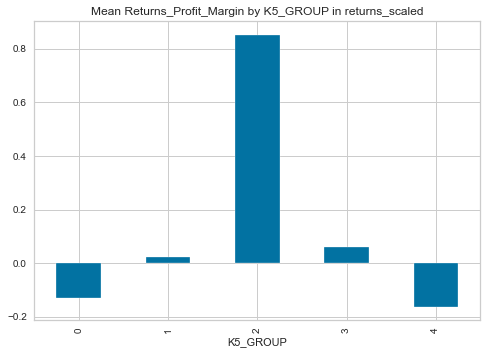

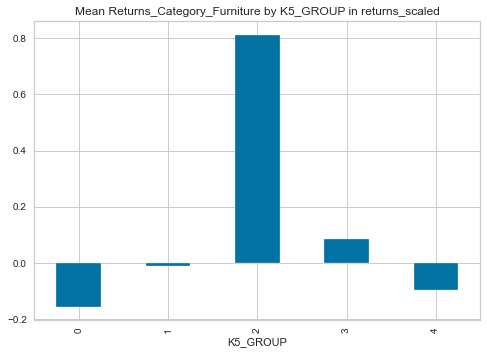

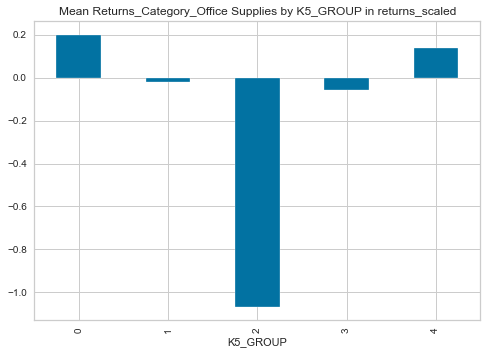

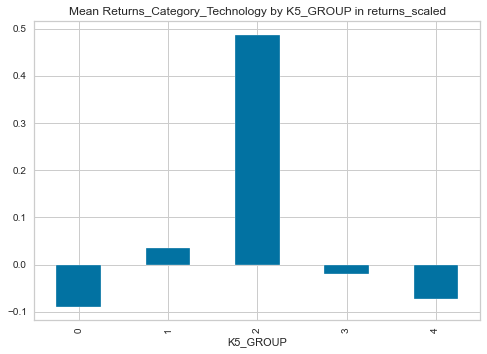

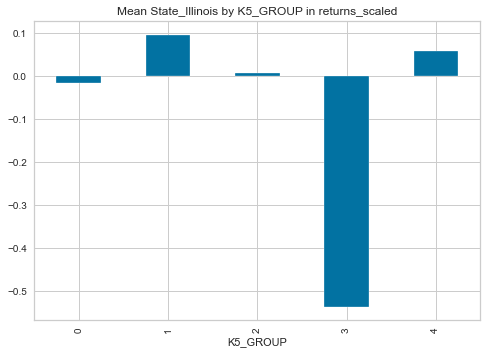

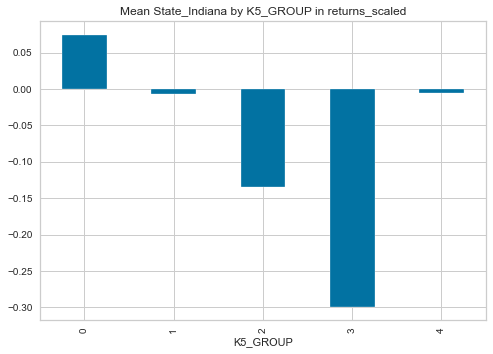

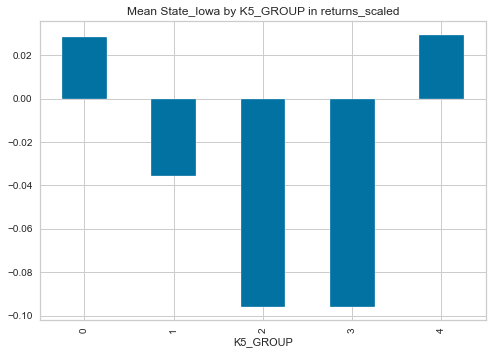

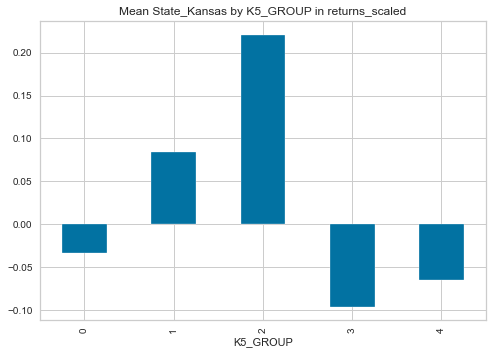

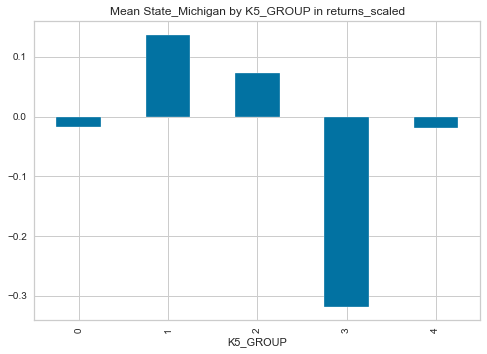

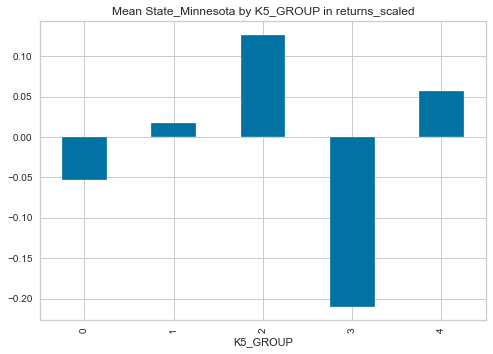

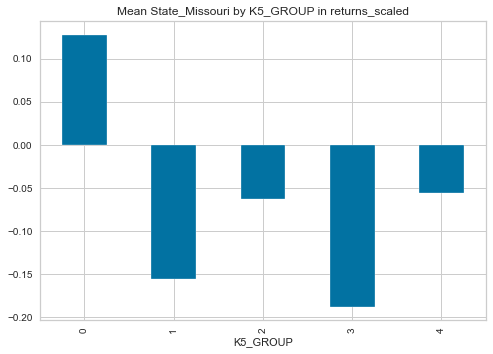

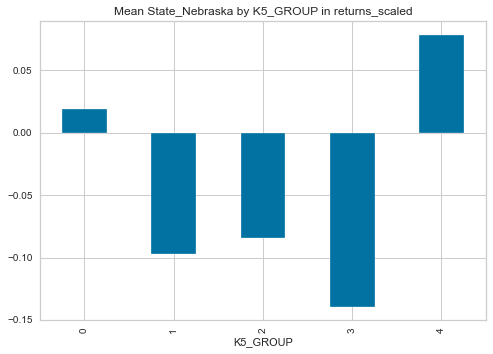

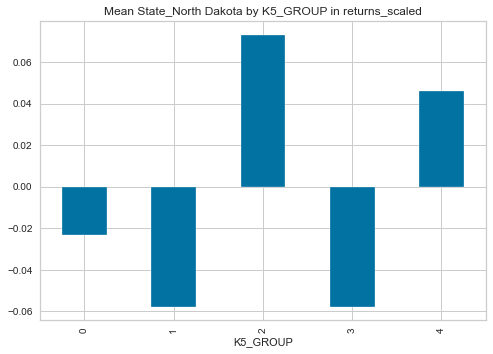

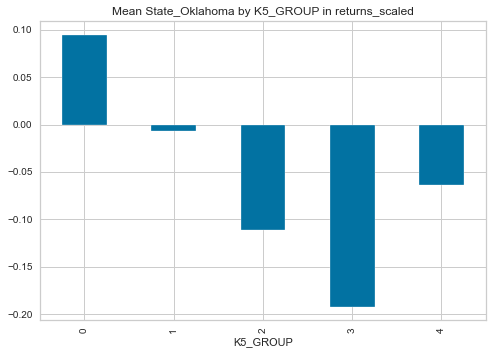

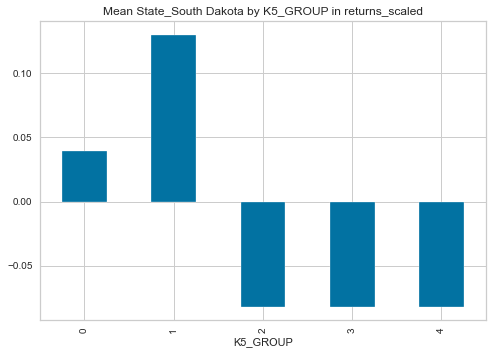

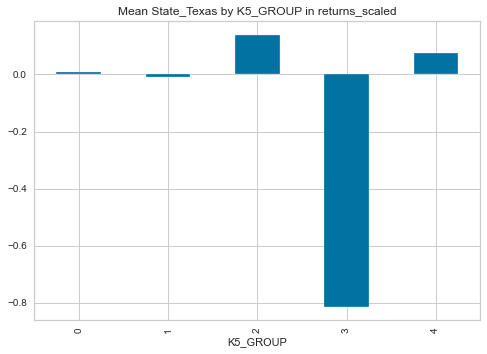

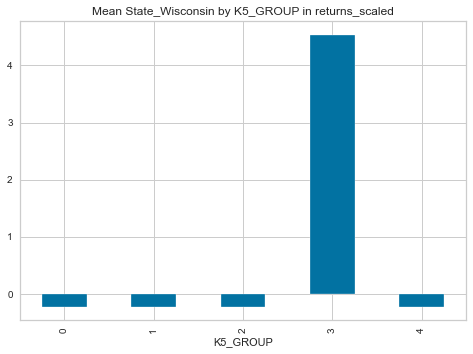

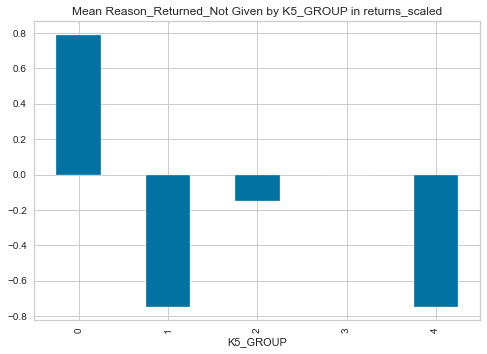

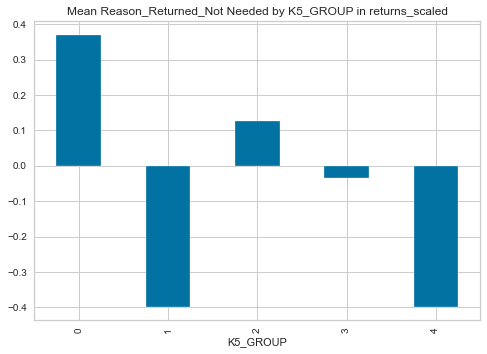

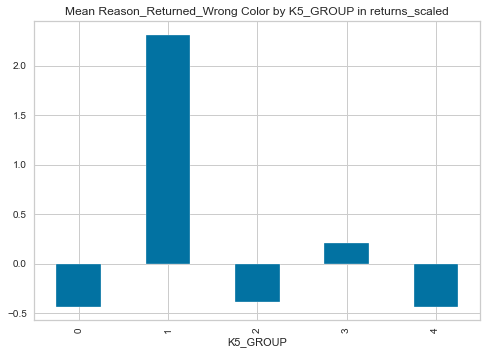

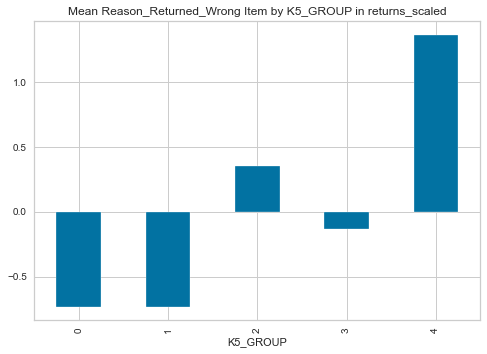

<IPython.core.display.Javascript object>

In [58]:
# For orders_scaled_k3, orders_scaled_k4, orders_scaled_k5, returns_scaled_k3, returns_scaled_k4 and returns_scaled_k5
for model_name in ["orders_scaled_k3", "orders_scaled_k4", "orders_scaled_k5", "returns_scaled_k3", "returns_scaled_k4", "returns_scaled_k5"]:
    df = head_dfs[names.index(model_name.split('_k')[0]) * len(clusters) + clusters.index(int(model_name[-1]))]
    group_means = df.groupby(f"K{model_name[-1]}_GROUP").mean()

    # For each feature, plot a bar chart
    for feature in group_means.columns:
        group_means[feature].plot(kind='bar', title=f"Mean {feature} by K{model_name[-1]}_GROUP in {model_name.split('_k')[0]}")
        plt.show()


<div style="border-top: 3px solid black"></div>  


<a id='section_id'></a>
<h3 style="color:blue">Covariance Matrix</h3>
<hr>
<h4 style="color:orange">OBSERVATION</h4>
<p style="font-size:15px">
A covariance matrix is a square matrix that represents the covariance between pairs of variables in a dataset. Covariance is a measure of how much two random variables vary together. It’s similar to variance, but where variance tells you how a single variable varies, covariance tells you how two variables vary together.

The covariance matrix is symmetric, i.e., the value at row i and column j is equal to the value at row j and column i. The diagonal entries of the covariance matrix are the variances of each variable, and the off-diagonal entries are the covariances between variables.

Here's how you interpret a covariance matrix:

Diagonal elements: The diagonal elements of the matrix represent the variance of the variables. In other words, it's the square of the standard deviation of each feature. A high variance indicates that the data points are very spread out from the mean, and from one another.

Off-diagonal elements: The off-diagonal elements represent the covariance between the pairs of variables. A positive covariance indicates that the two variables increase or decrease together, whereas a negative covariance indicates that as one variable increases, the other decreases, and vice versa.

Magnitude of the covariance: The larger the absolute value of the covariance, the stronger the relationship between the variables. A covariance of 0 indicates no relationship.

However, keep in mind that covariance doesn't tell you about the strength of the relationship between variables. For that, you would use the correlation coefficient, which is normalized and always lies between -1 and 1. It's typically computed from the covariance matrix by dividing each off-diagonal element by the square root of the product of the corresponding diagonal elements.
    
 two large covariance matrices for orders_scaled and returns_scaled. To make sense of these matrices and their relationships, a typical approach is to perform dimensionality reduction techniques such as Principal Component Analysis (PCA), as we discussed earlier.

PCA can help you find which dimensions (or combinations of your variables) account for the most variance in your data. This can help you make sense of the relationships in your data without having to interpret every single element in the covariance matrix.

In addition, you can also visualize the covariance matrix using a heat map, which can be easier to understand visually. High (positive) covariances can be indicated with one color (e.g., red), low (negative) covariances with another (e.g., blue), and covariances near zero with another (e.g., white). This can help you quickly identify variables that are closely related.   

</p>
<ol>
<li>
<b>Sub-section Title :</b>
<p>Description for this sub-section goes here.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<p></p>
<li>
<b>Another Sub-section Title :</b>
<p>Description for this sub-section goes here.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<!-- Add as many list items as you need -->
</ol>
<a href='#top'>🔼</a>


In [59]:
# Compute covariance matrix for orders_scaled
orders_cov = np.cov(orders_scaled.T)
print("Covariance matrix for orders_scaled:\n", orders_cov)

# Compute covariance matrix for returns_scaled
returns_cov = np.cov(returns_scaled.T)
print("\nCovariance matrix for returns_scaled:\n", returns_cov)


Covariance matrix for orders_scaled:
 [[ 1.00004157  0.76986543 -0.03169701 ... -0.00152745  0.00851408
  -0.00779598]
 [ 0.76986543  1.00004157 -0.02115532 ... -0.01114477  0.00913451
   0.00353648]
 [-0.03169701 -0.02115532  1.00004157 ...  0.00510745 -0.01104566
   0.00620082]
 ...
 [-0.00152745 -0.01114477  0.00510745 ...  1.00004157 -0.65412522
  -0.50608267]
 [ 0.00851408  0.00913451 -0.01104566 ... -0.65412522  1.00004157
  -0.32140084]
 [-0.00779598  0.00353648  0.00620082 ... -0.50608267 -0.32140084
   1.00004157]]

Covariance matrix for returns_scaled:
 [[ 1.00082850e+00  9.10491603e-01  2.35969452e-01  2.35462986e-01
  -4.23549541e-01  2.84737542e-01 -1.87199657e-02 -2.58604075e-02
  -2.27358884e-02  4.88571339e-02  6.06697519e-02  3.21922942e-02
  -4.09701151e-02 -2.72209344e-02 -4.04392758e-04 -3.07917561e-02
  -7.08474541e-03  2.62432920e-02 -3.33082023e-02 -3.42867096e-02
  -1.59261058e-02 -7.42535061e-02  1.02699600e-01]
 [ 9.10491603e-01  1.00082850e+00  4.04417799e-01

<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>  


<a id='section_id'></a>
<h3 style="color:blue">Principal Component Analysis</h3>
<hr>
<h4 style="color:orange">OBSERVATION</h4>
<p style="font-size:15px">
Principal Component Analysis (PCA) is a dimensionality reduction technique that is commonly used in machine learning and data visualization. It's a way of identifying patterns in data and expressing the data in such a way so as to highlight their similarities and differences. The goal of PCA is to identify the most meaningful basis to re-express a complex, noisy, and possibly correlated dataset.

Here's how PCA works:

Standardization: PCA is affected by scale, so you need to scale the features in your data before applying PCA. Use StandardScaler to standardize the features to have mean=0 and variance=1.

Covariance Matrix computation: The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them.

Compute the Eigenvalues and Eigenvectors: Eigenvectors and eigenvalues are the linear algebra concepts that we need to compute from the covariance matrix. Once eigenvectors are found from the covariance matrix, the next step is to order them by eigenvalue, highest to lowest. This gives us the components in order of significance.

Forming Principal Components: The eigenvectors with the highest eigenvalues carry the most information about the distribution of the data. These are the principal components.

Interpreting the PCA results:

Explained Variance: The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

Principal Components: The principal components are less interpretable and do not have any real meaning since they are constructed as linear combinations of the initial variables. These components are constructed in such a way that they are not correlated and most of the information within the initial variables is squeezed or compressed into the first components. So, the first principal component bears the most resemblance to the original data.

Scree plot: This plot helps to visualize the proportion of the dataset's variance that each Principal Component contributes. The plot is constructed as a bar chart where each bar corresponds to each of the Principal Components, and the height of the bar indicates the proportion of the total variance contributed by that Principal Component. It helps to decide how many Principal Components should be retained.

Biplot: This plot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components. It also displays the original variables as vectors. The direction and length of the vectors indicate how each variable contributes to the principal components. The biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original variables.

In summary, PCA helps to bring out strong patterns in a dataset by suppressing noise. It's a powerful tool for data visualization, as it allows us to see trends and patterns in a way that is easier for humans to interpret. However, it can be challenging to interpret the transformed data, as the new dimensions don't correspond to any real-world concepts. It's a trade-off between interpretability and improved model performance.
    
    
Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning and statistics. It works by identifying the axes in the data that capture the most variation. These axes, known as principal components, are orthogonal to each other, meaning they're at right angles to each other.

The output you've provided looks like it's the coordinates of your original data points in the new basis defined by the principal components. Each row corresponds to a data point, and each column corresponds to a principal component.

In the case of your data, it appears you've calculated two principal components for each of your two datasets: "orders_scaled" and "returns_scaled".

For "orders_scaled" dataset:

The first column corresponds to the first principal component, which captures the most variance in the data. A high positive value (like 0.85492483 for the first data point) suggests that this data point has a high value along this dimension relative to the average.
The second column corresponds to the second principal component, which captures the second most variance in the data. It's orthogonal to the first principal component.
The same interpretation applies to the "returns_scaled" dataset.

Keep in mind, PCA components do not have an inherent meaning on their own. They are mathematical constructs used to simplify the complexity of high-dimensional data. The interpretation of these components can sometimes be related back to the original features, but it depends heavily on the specific dataset and the correlations between features. This correlation between features is what PCA is capturing and simplifying into principal components.    
    
    
Great, it seems like you've successfully computed the explained variance ratios.

The results from the PCA with 2 components:

For orders_scaled, the first principal component explains approximately 8.02% of the variance in your data, and the second principal component explains approximately 4.64% of the variance. This means that together, these two principal components explain about 12.66% of the total variance in your orders_scaled data.

For returns_scaled, the first principal component explains approximately 12.10% of the variance in your data, and the second principal component explains approximately 6.86% of the variance. This means that together, these two principal components explain about 18.97% of the total variance in your returns_scaled data.

Note that these percentages are relatively low, which suggests that the first two principal components do not capture a large proportion of the variance in your data. You may need to use more components to adequately capture the variability in your data.

The results from the PCA with 3 components:

For orders_scaled, the first principal component explains approximately 25.37% of the variance in your data, the second principal component explains approximately 21.86% of the variance, and the third principal component explains approximately 20.47% of the variance. This means that together, these three principal components explain about 67.7% of the total variance in your orders_scaled data.

For returns_scaled, the first principal component explains approximately 25.58% of the variance in your data, the second principal component explains approximately 22.47% of the variance, and the third principal component explains approximately 20.40% of the variance. This means that together, these three principal components explain about 68.45% of the total variance in your returns_scaled data.

These percentages are considerably higher than in the two-component case, suggesting that three components capture a substantial proportion of the variance in your data.

Remember that the goal of PCA is to reduce the dimensionality of your data while preserving as much of the variance as possible. If the first few components explain a high proportion of the total variance, it suggests that you may be able to reduce the dimensionality of your data without losing too much information. However, these decisions should be made carefully and in the context of the specific task or analysis at hand.
</p>
<ol>
<li>
<b>Sub-section Title :</b>
<p>Description for this sub-section goes here.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<p></p>
<li>
<b>Another Sub-section Title :</b>
<p>Description for this sub-section goes here.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<!-- Add as many list items as you need -->
</ol>
<a href='#top'>🔼</a>


In [60]:
from sklearn.decomposition import PCA

# PCA for orders_scaled
pca_orders = PCA(n_components=2)
orders_pca = pca_orders.fit_transform(orders_scaled)

print("Principal Component Analysis for orders_scaled:\n", orders_pca)

# PCA for returns_scaled
pca_returns = PCA(n_components=2)
returns_pca = pca_returns.fit_transform(returns_scaled)

print("\nPrincipal Component Analysis for returns_scaled:\n", returns_pca)


Principal Component Analysis for orders_scaled:
 [[ 0.85492483  2.14865206]
 [-0.63626427  0.63690154]
 [ 0.86893238  2.18362281]
 ...
 [-1.68641803  0.9929821 ]
 [-1.55572522  1.22455548]
 [-1.5645637   1.18332666]]

Principal Component Analysis for returns_scaled:
 [[-1.09160649  0.61972004]
 [-1.83205683  1.19468591]
 [-1.34812939 -0.52262979]
 ...
 [-1.63316523  1.53060239]
 [-1.74667412  0.55095465]
 [-1.74667412  0.55095465]]


<IPython.core.display.Javascript object>

In [61]:
print("Explained Variance Ratio for orders_scaled: ", pca_orders.explained_variance_ratio_)
print("Explained Variance Ratio for returns_scaled: ", pca_returns.explained_variance_ratio_)


Explained Variance Ratio for orders_scaled:  [0.08021077 0.04635942]
Explained Variance Ratio for returns_scaled:  [0.12104605 0.06858723]


<IPython.core.display.Javascript object>

In [62]:
from sklearn.decomposition import PCA

# Let's assume orders_scaled and returns_scaled are your data matrices
# for simplicity, I'll just create some dummy data
import numpy as np
orders_scaled = np.random.rand(100, 5)
returns_scaled = np.random.rand(100, 5)

# Create a PCA object
pca_orders = PCA(n_components=3)
pca_returns = PCA(n_components=3)

# Fit the PCA model to your data
pca_orders.fit(orders_scaled)
pca_returns.fit(returns_scaled)

# Now you can access the explained variance ratio attribute
print("Explained Variance Ratio for orders_scaled: ", pca_orders.explained_variance_ratio_)
print("Explained Variance Ratio for returns_scaled: ", pca_returns.explained_variance_ratio_)


Explained Variance Ratio for orders_scaled:  [0.25369053 0.21856016 0.20468216]
Explained Variance Ratio for returns_scaled:  [0.25576113 0.22473694 0.2039744 ]


<IPython.core.display.Javascript object>

<a id='section_id'></a>
<h3 style="color:blue">Variance Explained</h3>
<hr>
<h4 style="color:orange">OBSERVATION</h4>
<p style="font-size:15px">
Variance

Beginner Explanation: Imagine you and your friends decide to measure your heights. If everyone is about the same height, let's say around 5 feet 7 inches, there isn't much difference, or "variance", in your heights. Now suppose you include your basketball team in the measurement. Some players are as tall as 6 feet 5 inches, while others are as short as 5 feet 5 inches. Now there's a lot more difference, or "variance", in the heights. Variance is a way to measure how much things differ from each other.

Intermediate Explanation: Variance is a statistical measure that tells us how much a set of observations differ from each other. In a dataset, if the values are spread out, they have a high variance. If the values are close to each other, they have a low variance. Mathematically, variance is the average of the squared differences from the mean. For example, if we have a dataset [2, 4, 6, 8], the mean is 5. The differences from the mean are [-3, -1, 1, 3], and the squared differences are [9, 1, 1, 9]. The variance is the average of these squared differences, which is 5.

Explained Variance

Beginner Explanation: Let's say you're trying to guess the weight of your classmates based on their height and the type of sport they play. You find that the height is a really good clue - tall people generally weigh more, and short people generally weigh less. The type of sport they play doesn't seem to matter as much. In this case, we might say that most of the "variance" in weights is "explained" by the height.

Intermediate Explanation: In statistics, explained variance refers to the portion of the total variance that is accounted for by a statistical model. For example, in a regression model, the explained variance would be the proportion of the variance in the dependent variable that is predictable from the independent variable(s). In the context of Principal Component Analysis (PCA), the explained variance by a principal component is the variance of the original variables that is accounted for by that component. So, if the first principal component explains 80% of the variance, that means it contains 80% of the total "information" present in the original variables.
    
</p>
<ol>
<li>
<b>Sub-section Title :</b>
<p>Description for this sub-section goes here.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<p></p>
<li>
<b>Another Sub-section Title :</b>
<p>Description for this sub-section goes here.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<!-- Add as many list items as you need -->
</ol>
<a href='#top'>🔼</a>
